# Лабораторная работа 3. Обучение без учителя

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

## EM-алгоритм

### Краудсорсинг

Разметка данных — одна из самых трудозатратных задач в машинном обучении. Краудсорсинг позволяет распределить эту задачу на тысячи исполнителей, каждый из которых подготавливает небольшую часть датасета (подробнее <a href="https://academy.yandex.ru/posts/chto-takoe-kraudsorsing-i-pochemu-emu-nuzhno-uchitsya">тут</a>).

Пользователи могут допускать ошибки при разметке, кроме того, среди пользователей могут быть боты. Если мы попросим разметить каждый объект только одного пользователя, то с большой вероятностью получим не достаточно качественную разметку. Обычно каждый объект размечают несколько пользователей.

Результаты разметки нужно обработать. Самый простой метод *голос большинства*. Он заключается в том, что для каждого объекта нужно взять тот класс, который чаще всего ставили пользователи данному объекту. Это достаточно хороший метод, но он не учитывает различные особенности пользователей. Далее рассмотрим метод, который позволяет оценивать вероятность того, что разметчик ошибся.

### Метод Дэвида-Скина (Dawid, Skene, 1979)

Мы имеем в качестве данных $n_{ik}^u$ &mdash; количество раз, при которых разметчик $u \in U$ поставил класс $k \in K$ объекту $i \in I$ (возможно, разметчик видел этот объект несколько раз). Обозначим $Y_{ik} = I\{\text{объект $i$ класса $k$}\}$, это наши латентные величины. 

В качестве параметров имеем
* $\pi_{k\ell}^u$ &mdash; вероятность того, что разметчик $u$ поставил класс $\ell$ вместо правильного класса $k$. 
* $\rho_k$ &mdash; вероятность класса $k$.

Поймём, какой будет функция неполного правдоподобия в этой задаче. Прежде всего,

$$p_{\pi,p}(N, Y) = \prod_{i\in I}p(N_i, Y_i),$$

Если $k$ - номер класса $i$-го объекта, то

$$p(N_i, Y_i)=\underbrace{p(\text{объект $i$ класса $k$})}_{=\rho_k}p(N_i\mid\text{объект $i$ класса $k$})$$

(значения $Y_{it}$ однозначно определяются номером истинного класса, поэтому справа $Y_i$ пропадает). Далее, мы считаем, что разметчики действуют независимо, поэтому

$$p(N_i\mid\text{объект $i$ класса $k$}) = \prod_{u\in U}p(N_i^u\mid\text{объект $i$ класса $k$}).$$

Разберёмся с величиной $p(N_i^u\mid\text{объект $i$ класса $k$})$. Она отвечает за то, какие классы $u$-й разметчик ставил $i$-му объекту. Мы считаем, что встречи разметчика с объектом упорядочены по времени, тогда

$$p(\text{$u$-й разметчик отнёс $i$-й объект к классам $k'_1,\ldots,k'_r$}\mid\text{объект $i$ класса $k$}) =$$

$$=\prod_{s}p(\text{в $s$-ю встречу с $i$-м объектом $u$-й разметчик отнёс его к классу $k'_s$}\mid\text{объект $i$ класса $k$})$$

Эту вероятность можно переписать в виде

$$\prod_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u},$$

а итоговое неполное правдоподобие предстаёт в виде

$$p_{\pi,p}(N, Y) = \prod_{i\in I}\prod_{k \in K} \left( \rho_k \prod_{u\in U} \prod_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u} \right)^{Y_{ik}}$$

Его нам нужно максимизировать по $\pi$ и $\rho$

**Пояснение к формуле:** 

Вне больших скобок фиксируются объект и его класс, сама скобка возводится в степень 1, если рассматривается правильный класс объекта, и в степень 0 иначе. Внутри сначала записана вероятность того, что объект имеет данный класс, а затем &mdash; перебор по всем пользователям и всем классам, которые мог поставить данный пользователь. Наконец, записывается вероятность того, что пользователь нашему объекту поставил некоторый класс, которая возводится в степень того, сколько раз он поставил этот класс. Например, если пользователь видел изображение котика 5 раз, при этом 3 раза он сказал, что котик, а два раза &mdash; песик, то вероятность $\pi_{cat,cat}^u$ для данного котика учтется 3 раза, а вероятность $\pi_{cat,dog}^u$ &mdash; 2 раза.

**Задание 1 (2 балл)**

Распишите итерационную процедуру EM-алгоритма и значение ELBO в методе Дэвида-Скина.

---

#### $$\ell_N(\theta) = \log p_{\theta}(N) = E_{Y \sim q}\log p_{\theta}(N) = E_{Y \sim q}\log \frac{q(Y) p_{\theta}(N,Y)}{q(Y) p_{\theta}(Y|N)} =\\ $$  $$= E_{Y\sim q}\log \frac{p_{\theta}(N, Y)}{q(Y)} + E_{Y \sim q}\log\frac{q(Y)}{p_{\theta}(Y|N)}=\\ $$  $$=\text{ELBO}_{\theta}(q) + \text{KL}(q,p_{\theta}(\cdot |N)) = \text{ELBO}_{\theta}(p_{\theta}(\cdot |N)) \geq \text{ELBO}_{\theta}(p_{\hat{\theta}}(\cdot |N)), ~ \forall \hat{\theta}$$

В том числе
#### $$\ell_N(\theta_t) = \text{ELBO}_{\theta_t}(p_{\theta_t}(\cdot |N)) \stackrel{М-шаг}{\leq}
\max\limits_{\theta}\text{ELBO}_{\theta}(p_{\theta_t}(\cdot |N)) := \text{ELBO}_{\theta_{t+1}}(p_{\theta_t}(\cdot |N))\stackrel{Е-шаг}{\leq} \text{ELBO}_{\theta_{t+1}}(p_{\theta_{t+1}}(\cdot |N))=\ell_N(\theta_{t+1})$$

Отсюда получаем итерационный __EM-алгоритм__:

1. Инициализировать $\theta_0 = (\pi, \rho)$
2. __E-шаг__: дано $\theta_t= (\pi, \rho)$, найти $p_{\theta_t}(\cdot |N)$

    #### $$\gamma_{ik}= p_{\theta_t}(Y_{ik} |N) = \prod\limits_{u \in U} p_{\theta_t}(Y_{ik} |N_i^u)=
    \prod\limits_{u \in U} \frac{p_{\theta_t}(N_i^u | Y_{ik})p_{\theta_t}(Y_{ik})}{p_{\theta_t}(N_i^u)}=
    \prod\limits_{u \in U} \prod\limits_{\ell \in K} \frac{\left( \pi_{k\ell}^u \right)^{n_{i\ell}^u} \rho_k}{p_{\theta_t}(N_i^u)}=
    \rho_k\prod\limits_{u \in U} \frac{\prod\limits_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u}}{\sum\limits_{k\in K}p_{\theta_t}(N_i^u| Y_{ik})p_{\theta_t}(Y_{ik})}=\\ =
    \rho_k\prod\limits_{u \in U} \frac{\prod\limits_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u}}{\sum\limits_{s\in K}\rho_s\prod\limits_{\ell \in K} \left( \pi_{s\ell}^u \right)^{n_{i\ell}^u} }=
    \frac{\rho_k\exp\left\{ \sum\limits_{\ell \in K}\sum\limits_{u \in U}n_{i\ell}^u \log \pi_{k\ell}^u \right\}}   {\sum\limits_{s \in K}\rho_s\exp\left\{ \sum\limits_{\ell \in K}\sum\limits_{u \in U}n_{i\ell}^u \log \pi_{s\ell}^u \right\}}=
    \frac{\exp\left\{C + \log\rho_k + \sum\limits_{\ell \in K}\sum\limits_{u \in U}n_{i\ell}^u \log \pi_{k\ell}^u \right\}}   {\sum\limits_{s \in K}\exp\left\{C + \log\rho_s + \sum\limits_{\ell \in K}\sum\limits_{u \in U}n_{i\ell}^u \log \pi_{s\ell}^u \right\}}
    $$
   
   
3. __М-шаг__: дано $\gamma_{ik}= p_{\theta_t}(Y_{ik} |N)$, найти $ \theta_{t+1} = arg\max\limits_{\theta}\text{ELBO}_{\theta}(p_{\theta_t}(\cdot |N))= (\pi, \rho)$
 
    #### $$arg\max\limits_{\theta}\text{ELBO}_{\theta}(p_{\theta_t}(\cdot |N)) =
    arg\max\limits_{\theta}E_{Y\sim p_{\theta_t}(\cdot |N)}\log \frac{p_{\theta}(N, Y)}{p_{\theta_t}(Y|N)}=
    arg\max\limits_{\theta}E_{Y\sim p_{\theta_t}(\cdot |N)}\log p_{\theta}(N, Y)=\\
    arg\max\limits_{\theta}E_{Y\sim p_{\theta_t}(\cdot |N)}\log \prod_{i\in I}\prod_{k \in K} \left( \rho_k \prod_{u\in U} \prod_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u} \right)^{Y_{ik}}=\\
    arg\max\limits_{\theta}\sum_{i\in I}\sum_{k \in K}E_{Y\sim p_{\theta_t}(\cdot |N)} Y_{ik} \left(\log  \rho_k +  \sum_{u\in U} \sum_{\ell \in K}  n_{i\ell}^u \log  \pi_{k\ell}^u \right)=\\
    arg\max\limits_{(\pi, \rho)}\sum_{i\in I}\sum_{k \in K} p_{\theta_t}(Y_{ik} |N) \left(\log  \rho_k +  \sum_{u\in U} \sum_{\ell \in K}  n_{i\ell}^u \log  \pi_{k\ell}^u \right)
    $$
    
    #### $$\rho = arg\max\limits_{\rho}\sum_{i\in I}\sum_{k \in K} p_{\theta_t}(Y_{ik} |N) \log  \rho_k \Longrightarrow \\
    \rho_k = \frac{1}{|I|} \sum_{i\in I}p_{\theta_t}(Y_{ik} |N)=\frac{1}{|I|} \sum_{i\in I}\gamma_{ik}$$
     
    #### $$\pi = arg\max\limits_{\pi}\sum_{i\in I}\sum_{k \in K} p_{\theta_t}(Y_{ik} |N)\sum_{u\in U} \sum_{\ell \in K}  n_{i\ell}^u \log  \pi_{k\ell}^u \Longrightarrow \\
    \pi_{k\ell}^u = \frac{ \sum_{i\in I} \gamma_{ik} n_{i\ell}^u }{ \sum_{s \in K} \sum_{i\in I} \gamma_{ik} n_{is}^u }$$
    
4. Пока последовательность $\theta_t$ не сошлась, повторять 2, 3

#### $\text{ELBO}_{\theta}(p_{\theta}(\cdot |N)) = E_{Y\sim p_{\theta}(\cdot |N)}\log \frac{p_{\theta}(N, Y)}{p_{\theta}(Y|N)} = \sum_{i\in I}\sum_{k \in K} \gamma_{ik} \log\frac{p_{\theta}(N, Y_{ik})}{\gamma_{ik}} = 
\sum_{i\in I}\sum_{k \in K} \gamma_{ik} \left(\log\rho_k \prod_{u\in U} \prod_{\ell \in K} \left( \pi_{k\ell}^u \right)^{n_{i\ell}^u} - \log\gamma_{ik}\right)= \\ =
\sum_{i\in I}\sum_{k \in K} \gamma_{ik} \left(\log\rho_k + \sum_{u\in U} \sum_{\ell \in K} n_{i\ell}^u \log\pi_{k\ell}^u  - \log\gamma_{ik}\right)=
\sum_{k \in K}\sum_{i\in I} \gamma_{ik} \left(\log\rho_k - \log\gamma_{ik}\right) + \sum_{k \in K}\sum_{i\in I} \gamma_{ik}\sum_{\ell \in K}\sum_{u\in U}  n_{i\ell}^u \log\pi_{k\ell}^u
$

**Задание 2 (3 балла)** 

Реализуйте следующие методы агрегации результатов разметки в краудсорсинге:

* голосование по большинству;
* метод Дэвида-Скина.

Оба метода должны возвращать вероятность принадлежности объекта каждому из классов (итоговая метка получается выбором класса с наибольшей оценкой вероятности). 

Заметим, что метод голосования по большинству можно реализовать с помощью одной агрегирующей функцией `pandas.crosstab`, а метод Дэвида-Скина основывается на EM-алгоритме (при реализации стоит учесть, что EM-алгоритм сходится в локальные оптимумы, то есть его стоит запускать из разных начальных приближений).

Примените эти два метода к датасетам *Toloka Aggregation Relevance 2* и *Toloka Aggregation Relevance 5*, которые можно скачать <a href="https://toloka.ai/ru/datasets">тут</a>, и сравните их между собой. 

Обратите внимание, что в последнем датасете 5 различных меток, причем некоторые объекты в датасете имеют не один, а несколько правильных ответов. Любой из таких ответов считается правильным.

In [2]:
from IPython.display import clear_output

import einops
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.base import TransformerMixin
from tqdm import tqdm

In [44]:
def accuracy(transformer, golden_labels):
    task_ids = golden_labels['task_id'].unique()
    probs = transformer.transform(task_ids)
    labels = pd.get_dummies(probs.idxmax(axis='columns'))
    labels.columns = probs.columns
    correct_labels = golden_labels.pivot(index='task_id', columns='label', values='label').notnull()
    correct_labels = correct_labels.loc[task_ids]
    correct_by_observation = (correct_labels & labels).any(axis='columns')
    accuracy = correct_by_observation.mean()
    
    return accuracy

In [1934]:
class Majority(TransformerMixin):
    def __init__(self):
        super().__init__()
        self.gamma = None
        
    def fit(self, crowd_labels):
        self.gamma = pd.crosstab(crowd_labels["task_id"], crowd_labels["label"], normalize='index')
        return self
    
    def transform(self, task_ids):
        return self.gamma.loc[task_ids]

In [1935]:
class Dawid_Skene(TransformerMixin):
    def __init__(self, stop=1e-3, patience=5, num_runs=10, plot=True):
        '''
        Инициализация класса Dawid_Skene.
        stop -- критерий остановки по изменению качества
        patience -- сколько итераций ждать перед остановкой
        num_runs -- количество различных инициализаций
        plot -- рисовать ли график
        '''
        
        super().__init__()
        self.stop = stop
        self.patience = patience
        self.num_runs = num_runs
        self.plot = plot
        self.golden_labels = None
        self.num_workers = None
        self.num_tasks = None
        self.num_classes = None
        self.pi = None
        self.rho = None
        self.gamma = None
        self.label_counts = dict()
        self.scores = pd.DataFrame(columns=['ELBO']).rename_axis('iteration')
        self.task_id_to_code = None
        self.labels = None
        self.best = dict()
        self.log = pd.DataFrame(columns=['ELBO', 'accuracy']).rename_axis('runs')
    
    def _initialize_parameters(self):
        '''
        Initialize random parameters.
        '''
        
        # pi[u, k, l] -- вероятность, что разметчик u поставил вместо правильного класса k класс l
        self.pi = np.random.dirichlet(np.ones(self.num_classes), size=(self.num_workers, self.num_classes))
        
        # rho[k] -- вероятность класса k
        self.rho = np.random.dirichlet(np.ones(self.num_classes))
        
        # gamma[i, k] -- вероятность, что объект i из класса k
        self.gamma = np.random.dirichlet(np.ones(self.num_classes), size=self.num_tasks)
        
    def _set_up(self, crowd_labels, golden_labels):
        self.scores = self.scores.iloc[0:0]
        self.best = dict()
        self.log = self.log.iloc[0:0]
        self.golden_labels = golden_labels
        self.num_workers = crowd_labels['worker_id'].nunique()
        self.num_tasks = crowd_labels['task_id'].nunique()
        self.num_classes = crowd_labels['label'].nunique()
        task_ids = crowd_labels['task_id'].astype('category').cat.categories
        self.task_id_to_code = pd.Series(range(len(task_ids)), index=task_ids)
        self.labels = sorted(crowd_labels['label'].unique())
        
        self._initialize_parameters()
        
        crowd_labels['worker_id'] = crowd_labels['worker_id'].astype('category').cat.codes
        crowd_labels['task_id'] = crowd_labels['task_id'].astype('category').cat.codes
        crowd_labels = crowd_labels.groupby(['label', 'worker_id', 'task_id'], as_index=False).size()
        for i, k in enumerate(self.labels):
            counts_k = crowd_labels[crowd_labels['label'] == k]
            row = counts_k['worker_id']
            col = counts_k['task_id']
            data = counts_k['size']
            self.label_counts[i] = bsr_array((data, (row, col)), shape=(self.num_workers, self.num_tasks))
    
    def _sum_k(self, k):
        '''
        Utility function, returns array of shape (num_tasks,)
        sum_k[i] = $\sum_{lu} n_{il}^u \log\pi_{kl}^u$
        '''
        
        sum_k = 0
        for l in range(self.num_classes):
            n_uil = self.label_counts[l]
            pi_ukl = self.pi[:, k, l:l+1]
            sum_k += np.sum(n_uil * np.log(pi_ukl + np.finfo(float).eps), axis=0)
            
        return sum_k
    
    def E_step(self):
        for k in range(self.num_classes):
            self.gamma[:, k] = np.log(self.rho[k]) + self._sum_k(k)
            
        self.gamma = np.exp(self.gamma)
        self.gamma /= einops.reduce(self.gamma, "task label -> task ()", "sum")       
    
    def M_step(self):
        self.rho = einops.reduce(self.gamma, "task label -> label", "sum") / self.gamma.sum()
        
        for k in range(self.num_classes):
            for l in range(self.num_classes):
                gamma_ik = self.gamma[:, k]
                n_uil = self.label_counts[l]
                self.pi[:, k, l] = np.sum(n_uil * gamma_ik, axis=1)

        norm = einops.reduce(self.pi, "marker true_label pred_label -> marker true_label ()", "sum")
        self.pi /= norm + np.finfo(float).eps
        
    def elbo(self):
        elbo = np.einsum("ik, ik", self.gamma, np.log(self.rho) - np.log(self.gamma + np.finfo(float).eps))
        for k in range(self.num_classes):
            elbo += np.einsum("i, i", self.gamma[:, k], self._sum_k(k))
            
        return elbo
        
    def _iter_end(self, run_id):
        self.scores.loc[len(self.scores)] = self.elbo()
        assert len(self.scores['ELBO']) <= 1 or self.scores['ELBO'].iloc[-1] >= self.scores['ELBO'].iloc[-2]
        if not self.plot:
            return
        
        scores = self.scores.rename(columns={'ELBO': f"ELBO, run {run_id}"})
        if self.best:
            best_scores = self.best['scores'].rename(columns={
                'ELBO': f"best run: ELBO {self.best['elbo']:.0f}" + \
                (f", accuracy {self.best['accuracy']:.3f}" if self.best['accuracy'] else "")
            })
            scores = pd.concat([scores, best_scores], axis=1)
            
        scores.plot()    
        plt.show()
        clear_output(wait=True)
        
    def _run_end(self):
        acc = None if self.golden_labels is None else accuracy(self, self.golden_labels)
        elbo = self.elbo()
        if not self.best or self.best['elbo'] < self.elbo():
            self.best = {
                'accuracy': acc,
                'elbo': elbo,
                'pi': self.pi,
                'rho': self.rho,
                'gamma': self.gamma,
                'scores': self.scores.copy()
            }
            
        self.log.loc[len(self.log)] = [elbo, acc]
        self._initialize_parameters()
        self.scores = self.scores.iloc[0:0]
            
    def _fit_end(self):
        self.pi = self.best['pi']
        self.rho = self.best['rho']
        self.gamma = self.best['gamma']
        self.scores = self.best['scores']
        if self.plot:
            best_scores = self.best['scores'].rename(columns={
                    'ELBO': f"best run: ELBO {self.best['elbo']:.0f}" + \
                    (f", accuracy {self.best['accuracy']:.3f}" if self.best['accuracy'] else "")
                })
            best_scores.plot()
    
    def fit(self, crowd_labels, golden_labels=None):
        '''
        Итерации EM-алгоритма.
        crowd_labels - таблица со столбцами worker_id, task_id, label
        golden_labels -- таблица правильных ответов со столбцами task_id, label
        '''
        
        assert list(crowd_labels.columns) == ['worker_id', 'task_id', 'label']
        assert golden_labels is None or list(golden_labels.columns) == ['task_id', 'label']
        self._set_up(crowd_labels.copy(), golden_labels)
        
        for run_id in range(self.num_runs):
            while (len(self.scores) < self.patience or
                   np.var(self.scores['ELBO'][-self.patience:]) / np.var(self.scores['ELBO']) > self.stop):
                self.E_step()
                self.M_step()
                self._iter_end(run_id)
                
            self._run_end()
            
        self._fit_end()
        
        return self
    
    def transform(self, task_ids):
        task_codes = self.task_id_to_code[np.array(task_ids)]
        probs = pd.DataFrame(self.gamma[task_codes], index=task_ids, columns=self.labels)
        probs = probs.rename_axis("label", axis="columns")
        return probs

In [1936]:
crowd_labels = pd.read_csv("data/TlkAgg2/crowd_labels.tsv", sep="\t", names=["worker_id", "task_id", "label"])
golden_labels = pd.read_csv("data/TlkAgg2/golden_labels.tsv", sep="\t", names=["task_id", "label"])

crowd_labels.nunique().rename_axis(f"Dataset size {len(crowd_labels)}. Unique values:")

Dataset size 475536. Unique values:
worker_id     7138
task_id      99319
label            2
dtype: int64

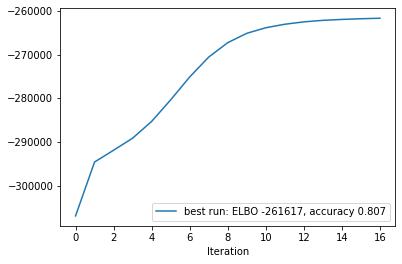

In [1937]:
dawid_skene = Dawid_Skene()
dawid_skene.fit(crowd_labels, golden_labels);

In [1938]:
def compare_accuracy(majority, dawid_skene):
    majority_accuracy = accuracy(majority, golden_labels)
    ax = dawid_skene.log.reset_index().plot.scatter('runs', 'accuracy')
    ax.axhline(majority_accuracy, color='red', label='majority')
    ax.axhline(dawid_skene.log['accuracy'].mean(),  label='dawid-skene mean', linestyle='--')
    ax.legend()

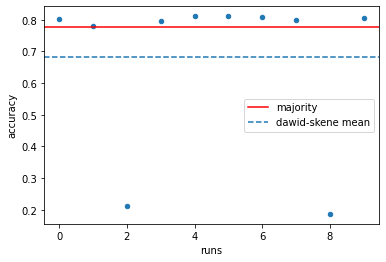

In [1939]:
majority = Majority()
majority.fit(crowd_labels)

compare_accuracy(majority, dawid_skene)

Метод большинства дает не такую хорошую точность, как метод Дэвида-Скина, но все же отлично работает для своей простоты.

Метод Дэвида-Скина при обучении  равновероятно показывает точность 0.8 и 0.2. Это связано с тем, что этот метод не различает ситуации, когда разметчик говорит правду и называет класс 1 и когда он врет и называет класс 0. С точки зрения метода Дэвида-Скина оба эта варианта одинаково хорошо описывают происходящее. Чтобы привнести в модель априорные знания о том, что все-таки разметчики чаще говорят правду, можно изменить инициализацию параметра $pi$, или воспользоваться предложением в следующем задании. Попробуем сначала первый вариант.

In [1940]:
class Dawid_Skene_v2(Dawid_Skene):
    def _initialize_parameters(self):
        super()._initialize_parameters()
        
        def dirichlet(alpha):
            return np.random.dirichlet(alpha, size=self.num_workers)
        
        alpha = np.ones(self.num_classes) + np.eye(self.num_classes)
        self.pi = np.apply_along_axis(dirichlet, 0, alpha)
        self.pi = einops.rearrange(self.pi, "marker pred_label true_label -> marker true_label pred_label")

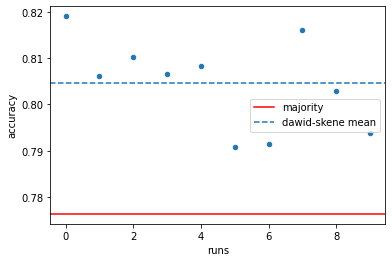

In [1941]:
dawid_skene = Dawid_Skene_v2(plot=False)
dawid_skene.fit(crowd_labels, golden_labels)

compare_accuracy(majority, dawid_skene)

Изменение инициализации помогло.

Теперь посмотрим на второй датасет.

In [1942]:
crowd_labels = pd.read_csv("data/TlkAgg5/crowd_labels.tsv", sep="\t", names=["worker_id", "task_id", "label"])
golden_labels = pd.read_csv("data/TlkAgg5/golden_labels.tsv", sep="\t", names=["task_id", "label"])

crowd_labels.nunique().rename_axis(f"Dataset size {len(crowd_labels)}. Unique values:")

Dataset size 1091918. Unique values:
worker_id      1273
task_id      363814
label             5
dtype: int64

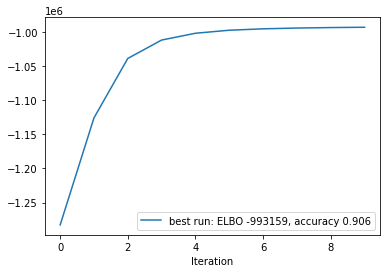

In [1943]:
dawid_skene.plot = True
dawid_skene.fit(crowd_labels, golden_labels);

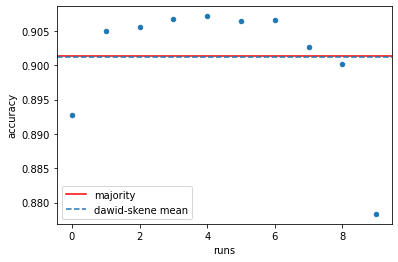

In [1944]:
majority.fit(crowd_labels)

compare_accuracy(majority, dawid_skene)

На этом датасете метод Дэвида-Скина в среднем дает точность, как у метода большинства, но с разбросом в 1 процент. Если проводить несколько инициализаций и выбирать лучшую по точности на валидационной выборке, если такая есть, или как композицию нескольких лучших по ELBO, то можно ожидать существенный выигрыш по сравнению с большинством.

---

**Задание 3 (1 балл)** 

Попробуйте в методе Дэвида-Скина в качестве начального приближения вероятностей классов для каждого объекта подавать те вероятности, которые посчитаны методом голосования по большинству, и провести сначала M-шаг.

In [1945]:
class Dawid_Skene_v3(Dawid_Skene):
    def _initialize_parameters(self):
        super()._initialize_parameters()
        
        majority = Majority()
        majority.fit(self.crowd_labels)
        self.gamma = majority.gamma.to_numpy()
        
    def M_step(self):
        super().E_step()
        
    def E_step(self):
        super().M_step()
        
    def fit(self, crowd_labels, golden_labels=None):
        self.crowd_labels = crowd_labels
        return super().fit(crowd_labels, golden_labels)

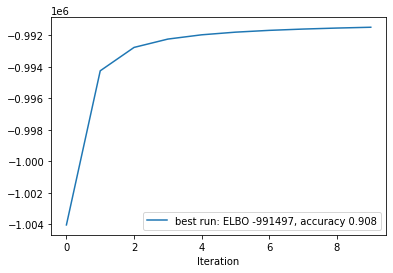

In [1946]:
dawid_skene = Dawid_Skene_v3()
dawid_skene.fit(crowd_labels, golden_labels);

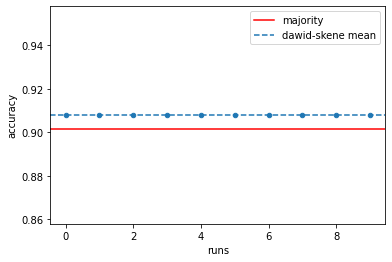

In [1947]:
compare_accuracy(majority, dawid_skene)

Используя majority как начальное приближение, метод Дэвида-Скина сошелся быстрее и показал наилучшую точность, причем результат детерминирован и не нужно запускать его несколько раз.

---

Далее мы будем работать с таблицей `vacancies.csv` и нам нужно подготовить данные для работы, а именно сделайте следующее:
    
- Разбейте данные на обучающую выборку (строки, не содержащие метки кластеров) и тестовую (строки, содержащие метки кластеров)
- Предобработайте текст, содержащийся в колонках *name* и *description* (уберите артефакты, нормализуйте и т.д.)

In [3]:
from bs4 import BeautifulSoup
import os
import pickle
import pymorphy2
from sklearn.feature_extraction.text import CountVectorizer
import warnings


class Analyzer:
    def __init__(self):
        self.vectorizer_analyzer = CountVectorizer().build_analyzer()
        self.morph_analyzer = pymorphy2.MorphAnalyzer()
        
    def normal_form(self, word):
        return self.morph_analyzer.parse(word)[0].normal_form
    
    def __call__(self, text):
        if pd.isna(text):
            return text
        
        return ' '.join(self.normal_form(word) for word in self.vectorizer_analyzer(text) if len(word) >= 3)
    
    def from_html(self, html):
        if pd.isna(html):
            return html
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            soup = BeautifulSoup(html, 'html.parser')
        
        return self(soup.get_text())

In [4]:
vacancies = pd.read_csv(
    "data/vacancies.csv",
    index_col='id',
    parse_dates=['created_at', 'published_at'],
    dtype={
        'id': 'int',
        'name': 'string',
        'description': 'string',
        'key_skills': 'string',
        'schedule_id': 'category',
        'employment_id': 'category',
        'experience_id': 'category',
        'accept_handicapped': 'category',
        'accept_kids': 'category',
        'salary_from': 'float',
        'salary_to': 'float',
        'salary_gross': 'category',
        'salary_currency': 'category',
        'area_id': 'category',
        'employer_id': 'category',
        'type_id': 'category',
        'category': 'category'
    }
)

analyzer = Analyzer()

if os.path.isfile(filename:="vacancies_text.pickle"):
    with open(filename, 'rb') as f:
        vacancies_text = pickle.load(f)
else:
    vacancies_text = pd.concat([vacancies['name'].apply(analyzer),
                            vacancies['description'].apply(analyzer.from_html),
                            vacancies['key_skills'].apply(analyzer)],
                           axis=1)
    with open(filename, 'wb') as f:
        pickle.dump(vacancies_text, f)

name_and_description = vacancies_text['name'].str.cat(vacancies_text['description'], sep=' ', na_rep='')
train_index, test_index = vacancies[mask:=vacancies['category'].isna()].index, vacancies[~mask].index
documents_train = name_and_description.loc[train_index]
documents_test = name_and_description.loc[test_index]

### Тематическое моделирование

Тематическое моделирование заключается в поиске тем $T$, которые хорошо бы описывали документы $D$ со словарём $W$. Большинство тематических моделей оперирует данными в формате "мешка слов", т.е. учитывают только частоты слов в документах, а не их порядок. Одной из простейших тематических моделей является [PLSA](https://en.wikipedia.org/wiki/Probabilistic_latent_semantic_analysis), которая приводит к задаче стохастического матричного разложения: 

$$F \approx \Phi \times \Theta$$
где
- $F_{W \times D}$— матрица распределений слов в документах (нормированные частоты)
- $\Phi_{W \times T}$ — матрица распределений слов в темах (модель)
- $\Theta_{T \times D}$ — матрица распределений тем в документах (результат применения модели к обучающим данным)

Можно сказать, что алгоритмы тематического моделирования производят мягкую бикластеризацию данных:
 - *мягкую*, так как объекты относятся не строго к одному кластеру, а к нескольким с разными вероятностями
 - *бикластеризацию*, так как модель одновременно кластеризует слова по темам и темы по документам.
 
 С вероятностной точки зрения, задача обучения модели PLSA ставится как максимизация неполного правдоподобия по параметам $\Phi$ и $\Theta$. ЕМ-алгоритм для модели PLSA заключается в повторении двух шагов:

- **Е-шаг** — оценка распределений тем для каждого слова в каждом документе по параметрам $\Phi$ и $\Theta$ (шаг 6);
- **М-шаг** — обновление параметров $\Phi$ и $\Theta$ на основе полученных оценок (шаги 7 и 9).

Существуют различные модификации итерационного процесса, позволяющие снизить расходы по памяти. В данном случае, мы избежим хранения трехмерной матрицы $p_{tdw}$, сразу пересчитывая $\Theta$ для текущего документа и аккумулируя счетчики $n_{wt}$ для последующего пересчета $\Phi$.

Псевдокод алгоритма записывается следующим образом:

1. Инициализировать $\phi_{wt}^0$ для всех $w \in W$, $t \in T$ и $\theta_{td}^0$ для всех $t \in T$, $d \in D$
2. Внешний цикл по итерациям $i = 1 ... max\_iter$:
3. $\quad$ $n_{wt}^i := 0$, $n_t^i := 0$ для всех $w \in W$ и $t \in T$ 
4. $\quad$ Внутренний цикл по документам $d \in D$  
5. $\qquad$ $Z_w := \sum_{t \in T} \phi_{wt}^{i-1}\theta_{td}^{i-1}$ для всех $w \in d$ $\cfrac{}{}$
6. $\qquad$ $p_{tdw} := \cfrac{ \phi_{wt}^{i-1}\theta_{td}^{i-1} }{ Z_w }$ (**E-шаг**)
7. $\qquad$ $\theta_{td}^{i} := \cfrac{ \sum_{w \in d} n_{dw} p_{tdw} }{ n_d }$ для всех $t \in T$ (**M-шаг**)
8. $\qquad$ Увеличить $n_{wt}^i$ и $n_t^i$ на $n_{dw} p_{tdw}$ для всех $w \in W$ и $t \in T$
9. $\quad \phi_{wt}^i := \cfrac{n_{wt}^i}{n_t^i}$ для всех $w \in W$ и $t \in T$ (**M-шаг**)

Обозначения:
 - $p_{tdw}$ — вероятность темы $t$ для слова $w$ в документе $d$
 - $\phi_{wt}$ — элемент матрицы $\Phi$, соответствующий вероятности слова $w$ в теме $t$
 - $\theta_{td}$ — элемент матрицы $\Theta$, соответствующий вероятности темы $t$ в документе $d$
 - $n_{wt}$ — элемент матрицы счётчиков отнесения слова $w$ к теме $t$ (путем нормирования этой матрицы получается матрица $\Phi$)
 - $Z_w$ — элемент вектора вспомогательных переменных, соответствующий слову $w$
 - $n_t$ — вектор нормировочных констант для матрицы $n_{wt}$
 - $n_d$ — вектор нормировочных констант для матрицы $n_{dw}$
 - $n$ — суммарное число слов в коллекции

Для оценивания качества построенной модели и контроля сходимости процесса обучения обычно используют [перплексию](http://www.machinelearning.ru/wiki/images/8/88/Voron-iip9-talk.pdf):

$$\mathcal{P} = \exp\bigg(- \frac{\mathcal{L}}{n} \bigg) = \exp\bigg(- \cfrac{1}{n}\sum_{d \in D}\sum_{w \in d} n_{dw} \ln \big(\sum_{t \in T}\phi_{wt}\theta_{td} \big)\bigg)$$

Это традиционная мера качества в тематическом моделировании, которая основана на правдоподобии модели $\mathcal{L}$. Число итераций $max\_iter$ в алгоритме обучения следует выбирать достаточным для того, чтобы перплексия перестала существенно убывать. Однако известно, что перплексия плохо отражает интерпретируемость найденных тем, поэтому помимо нее обычно используются дополнительные меры или экспертные оценки.

**Рекомендации к реализации:**

- При делении на нулевые значения нужно просто заменить частное на ноль.
- ЕМ-алгоритм стоит реализовывать с использованием векторных операций. Для проверки корректности реализации сперва можно написать скалярную версию, после чего векторизовать её, удостоверившись, что обе реализации дают одинаковый результат. Невекторизованный алгоритм может работать в сотни раз медленнее векторизованного, и его использование может привести к невозможности выполнения задания.
- Итерационный процесс следует начинать, инициализировав матрицы $\Phi$ и $\Theta$. Инициализация может быть случайной, важно не забыть отнормировать столбцы матриц.
- Неэффективная реализация перплексии может в разы замедлить работу алгоритма.

**Задание 4 (3 балла)** 

Реализуйте описанный выше ЕМ-алгоритм для модели *PLSA* и добавьте в вашу реализацию подсчёт перплексии. 

Примените ваш алгоритм к подготовленным ранее данным (объедините текст из колонок *name* и *description*), рассмотрев число тем T = 5, а также:

* Постройте график значения перплексии в зависимости от итерации (убедитесь в корректности реализации: график перплексии должен быть невозрастающим). 
* Выведите для каждой темы топ-20 наиболее вероятных слов.

Посмотрите внимательно на полученные темы. Как вам кажется, получились ли они интерпретируемыми?


---

Рассмотрим ассиметричную модель PLSA, в которой данные генерируются соответственно следующей схеме:

1. Выбираем случайный документ d из распределения $P(d)$
2. Выбираем случайную тему t из распределения тем для данного документа $P(t|d)$
3. Выбираем случайное слово из распределения слов для данной темы $P(w|t)$

То есть в модели PLSA делается предположение условной независимости слов и документов относительно тем:

$$P(d,w|t) = P(d|t)P(w|t)$$

Если $N = \{n_{dw} = \# \text{слов $w$ в документе $d$}\}$ - наблюдения, то согласно модели наблюдениям соответсвуют неизвестные фиксированные латентные переменные $Y = \{t_{dw} - \text{тема, соответсвующая паре $(d, w)$}\}$.

Тогда совместная вероятность наблюдений и соответствующих гипотетических латентных переменных равна

$$P(N,Y) = \prod_{n} P(d_n, w_n, t_n)= 
\prod_{d \in D}\prod_{w \in W} P(d, w, t_{dw})^{n_{dw}}= 
\prod_{d \in D}\prod_{w \in W}\prod_{t \in T} P(d, w, t)^{n_{dw} I[t = t_{dw}]}
$$

где 

$$
P(d, w, t) = P(d, w|t)P(t) = P(d|t)P(w|t)P(t) = P(w|t)P(t|d)P(d)
$$

Как видно из этого разложения и из схемы генерации, модель характеризуется параметрами

$$\rho_d = P(d), ~\theta_{td} = P(t|d), ~\phi_{wt} = P(w|t),$$

которые совместно обозначим $\omega$. Нас интересуют параметры, которые лучше всего объясняют наблюдаемые данные, то есть

$$\omega = \arg\max\limits_{\omega} L(\omega|N)=\arg\max\limits_{\omega} \log P_\omega(N)
=\arg\max\limits_{\omega} \log \prod_{w \in W}\prod_{d \in D} P_\omega(d, w)^{n_{dw}}
,$$

где

$$
P_\omega(d, w) = P_\omega(w|d)P_\omega(d)=\sum_tP_\omega(w|t)P_\omega(t|d)P_\omega(d)
=\rho_d\sum_t\phi_{wt}\theta_{td}
$$

Получаем максимизацию логарифма суммы, что наводит на мысль применить EM-алгоритм.

__E-шаг__: Даны параметры $\omega$, найти $P_\omega(\cdot|N)$

$p_{tdw}=P_\omega(\{t_{dw}=t\}|N)=P_\omega(\{t_{dw}=t\}|d, w)$ - из предположения независимости наблюдений 

$$p_{tdw} = P_\omega(\{t_{dw}=t\}|d, w) =P_\omega(t|d, w) =
\cfrac{P_\omega(d, w, t)}{P_\omega(d,w)} =
\cfrac{\phi_{wt}\theta_{td}\rho_d}{\rho_d\sum_t\phi_{wt}\theta_{td}} = \cfrac{\phi_{wt}\theta_{td}}{\sum_t\phi_{wt}\theta_{td}}
$$

__M-шаг__: Дано распределение $P_\omega(\cdot|N)$, найти $\omega'= \arg\max\limits_{\omega'}\text{ELBO}_{\omega}(P_{\omega'}(\cdot |N))$

$$\omega'= \arg\max\limits_{\omega'}E_{Y\sim P_{\omega}(\cdot |N)}\log p_{\omega'}(N, Y)
=\arg\max\limits_{\omega'}E_{Y\sim p_{tdw}}\log \prod_{d \in D}\prod_{w \in W}\prod_{t \in T} P_{\omega'}(d, w, t)^{n_{dw} I[t = t_{dw}]}=\\
=\arg\max\limits_{\omega'} \sum_{d}\sum_{w}\sum_{t}\left(E_{Y\sim p_{tdw}}I[t = t_{dw}]\right)n_{dw}  \log P_{\omega'}(d, w, t)=\\
=\arg\max\limits_{\omega'} \sum_{d}\sum_{w}\sum_{t}p_{tdw}n_{dw}  \log P_{\omega'}(w|t)P_{\omega'}(t|d)P_{\omega'}(d)=\\
=\arg\max\limits_{\omega'} \sum_{d}\sum_{w}\sum_{t}p_{tdw}n_{dw}  \log \phi'_{wt}\theta'_{td}\rho'_d=\\
=\arg\max\limits_{\omega'} \sum_{d}\sum_{w}\sum_{t}p_{tdw}n_{dw}  \left(\log \phi'_{wt}+\log\theta'_{td}+\log\rho'_d\right)
$$

$$
Lagrange = \sum_{d}\sum_{w}\sum_{t}p_{tdw}n_{dw}  \left(\log \phi'_{wt}+\log\theta'_{td}+\log\rho'_d\right) 
-\sum_t\lambda_t\left(\sum_{w}\phi'_{wt} - 1\right) -\sum_d\lambda_d\left(\sum_{t}\theta'_{td} - 1\right) 
-\lambda\left(\sum_{d}\rho'_{d} - 1\right)
$$

$$
Lagrange'_{\phi'_{wt}} = 0 =\sum_{d}p_{tdw}n_{dw}\frac{1}{\phi'_{wt}} - \lambda_t \Rightarrow \\
\phi'_{wt} = \frac{\sum_{d}p_{tdw}n_{dw}}{\lambda_t} \propto \sum_{d}p_{tdw}n_{dw}
$$

$$
Lagrange'_{\theta'_{td}} = 0 =\sum_{w}p_{tdw}n_{dw}\frac{1}{\theta'_{td}} - \lambda_w \Rightarrow \\
\theta'_{td} = \frac{\sum_{w}p_{tdw}n_{dw}}{\lambda_w} \propto \sum_{w}p_{tdw}n_{dw}
$$

$$
Lagrange'_{\rho'_{d}} = 0 =\sum_{w}\sum_{t}p_{tdw}n_{dw}\frac{1}{\rho'_{d}} - \lambda \Rightarrow \\
\rho'_{d} = \frac{\sum_{w}\sum_tp_{tdw}n_{dw}}{\lambda} \propto \sum_{w}\sum_{t}p_{tdw}n_{dw}
$$

Теперь обратим внимание на реализацию. Поскольку в памяти уже хранится разреженный корпус размера d на w, то мы можем хранить в памяти разреженные тензоры такого же размера без вреда для ассимптотики, но не больше, то есть $p_{tdw}$ хранить мы не можем. Поэтому нам понадобится вычислять следующие промежуточные значения:

$
\gamma_{dw} = \cfrac{n_{dw}}{\sum_t \phi_{wt}\theta_{td}}
$

И переплести E и M шаги:

$
\theta'_{td} \propto \sum_{w}p_{tdw}n_{dw} \propto
\sum_{w}\cfrac{\phi_{wt}\theta_{td}}{\sum_t \phi_{wt}\theta_{td}}n_{dw} \propto
\theta_{td}\sum_{w}\phi_{wt}\gamma_{dw}
$

$
\phi'_{wt}
\propto \sum_{d}p_{tdw}n_{dw}
\propto \sum_{d}\cfrac{\phi_{wt}\theta_{td}}{\sum_t \phi_{wt}\theta_{td}}n_{dw}
\propto \phi_{wt}\sum_{d}\theta_{td}\gamma_{dw}
$

$
\rho'_{d} \propto \sum_{w}\sum_{t}\cfrac{\phi_{wt}\theta_{td}}{\sum_t \phi_{wt}\theta_{td}} n_{dw}
\propto \sum_{t}\theta_{td}\sum_{w}\phi_{wt}\gamma_{dw}
\propto \sum_{t}\theta'_{td}
$

Заметим, что в данной задаче во время обучения нас интересует не $P(d,w)$, а только $P(t|d)$, поэтому параметр $\rho$ можно опустить.

В качестве меры качества возьмем Perplexity per word:

$PP = \exp\left(\cfrac{H(q,p)}{|N|} \right)$, где $H(q,p)$ - кросс-энтропия между эмпирическим и модельным условными распределеними $P(w|d)$.

$$
PP = \exp\left(-\cfrac{1}{|N|} \sum_{d}\sum_{w} \cfrac{n_{dw}}{\sum_{w'} n_{dw'}} \ln P_\omega(w|d) \right)
= \exp\left(-\cfrac{1}{|D|} \sum_{d}\sum_{w} \cfrac{n_{dw}}{\sum_{w'} n_{dw'}} \ln \sum_t\phi_{wt}\theta_{td}  \right)=\\
= \exp\left(-\sum_{d}\sum_{w} n'_{dw} \ln \cfrac{n_{dw}}{\gamma_{dw}}  \right)
= \exp\left(-\sum_{d}\sum_{w} n'_{dw} \ln n_{dw} + \sum_{d}\sum_{w} n'_{dw}\ln\gamma_{dw}  \right)= \\
= C \cdot \exp\left(\sum_{d}\sum_{w} n'_{dw}\ln\gamma_{dw}  \right)
$$

где $n'_{dw} = \cfrac{1}{|D|}\cfrac{n_{dw}}{\sum_{w'} n_{dw'}},~
C =\exp\left(-\sum_{d}\sum_{w} n'_{dw} \ln n_{dw}\right)$

Perplexity per word можно интерпретировать как неуверенность модели при предсказании слова в документе. Например, если Perplexity per word равна 10, то можно сказать, что модель выбирает равномерно между 10 словами.

Применение обученной модели к новому документу $d'$:

$$
P(t|d') = \sum_{w}P(t|d',w)P(d',w) = \sum_{w}P(t|d',w)P(w|d')P(d') \propto
\sum_{w}P(t|d',w)P(w|d'),
$$

где $P(t|d',w)$ можно оценить как 
$P(t|w) = \cfrac{P(w|t)P(t)}{P(w)}
\propto P(w|t)\sum_d P(t|d)P(d) \propto \phi_{wt}\sum_d \theta_{td}\rho_d
$

a $P(w|d')$ эмпирически как $\cfrac{n_{d'w}}{\sum_{w'}n_{d'w}}$


In [5]:
class PLSA(TransformerMixin):
    def __init__(self, stop=1e-4, patience=5, num_runs=5, seed=None):
        '''
        Инициализация класса PLSA.
        stop -- критерий остановки по изменению качества
        patience -- сколько итераций ждать перед остановкой
        num_runs -- количество различных инициализаций
        '''
        
        super().__init__()
        
        self.stop = stop
        self.patience = patience
        self.num_runs = num_runs
        self.rng = np.random.default_rng(seed)
        
        self.num_classes = None
        self.vectorizer = None
        self.p_td = None
        self.p_wt = None
        self.gamma = None
        self.c = None
        self.document_indices = None
        self.word_indices = None
        self.document_term = None
        self.document_term_prime = None
        
        self.scores = pd.DataFrame(columns=['perplexity']).rename_axis('iteration')
        
    def _initialize_parameters(self):
        num_documents, num_words = self.document_term.shape
        
        # p_td[t, d] -- вероятность темы t для документа d
        self.p_td = np.transpose(self.rng.dirichlet(np.ones(self.num_classes), size=num_documents))
        
        # p_wt[w, t] -- вероятность слова w для темы t
        self.p_wt = np.transpose(self.rng.dirichlet(np.ones(num_words), size=self.num_classes))
        
        # gamma[d, w] -- промежуточные переменые
        self.gamma = np.abs(self.document_term).sign()
        
    def _set_up(self):
        self.scores = pd.DataFrame(columns=['perplexity']).rename_axis('iteration')
        self.document_term_prime = 1 / (self.document_term.shape[0] *
            einops.rearrange(self.document_term.sum(axis=1), "doc_size -> doc_size ()")
        ) * self.document_term
        self.c = np.exp(-np.sum(self.document_term_prime.data * np.log(self.document_term.data)))
        self.document_indices, self.word_indices = self.document_term.nonzero()
        
        self._initialize_parameters()
    
    def E_step(self):
        self.gamma.data = self.document_term.data * (1 / np.einsum(
            'it, ti -> i', self.p_wt[self.word_indices], self.p_td[:, self.document_indices]))
        
    def M_step(self):
        self.p_td, self.p_wt = (
            np.einsum('td, dt -> td', self.p_td, self.gamma @ self.p_wt),
            np.einsum('wt, tw -> wt', self.p_wt, self.p_td @ self.gamma)
        )
        self.p_td /= einops.reduce(self.p_td, 't d -> () d', 'sum')
        self.p_wt /= einops.reduce(self.p_wt, 'w t -> () t', 'sum')
        
    def perplexity(self):
        perplexity = self.c * np.exp(np.sum(self.document_term_prime.data * np.log(self.gamma.data)))
        
        return perplexity
    
    def _iter_end(self, run_id):
        self.scores.loc[len(self.scores)] = self.perplexity()
        
    def _run_end(self):
        pass
            
    def _fit_end(self):
        pass
            
    def _is_time_to_stop(self):
         return (len(self.scores) > self.patience and 
                 np.var(self.scores['perplexity'][-self.patience:]) <
                 self.stop * self.patience * np.var(self.scores['perplexity']))
    
    def fit(self, document_term, num_classes):
        assert isinstance(document_term, scipy.sparse._arrays.coo_array)
        
        self.document_term = document_term
        self.num_classes = num_classes
        
        self._set_up()
        
        for run_id in tqdm(range(self.num_runs), position=0, ncols=100, leave=False):
            self.E_step()
            while not self._is_time_to_stop():
                self.M_step()
                self.E_step()
                self._iter_end(run_id)
            self._run_end()
        self._fit_end()
        
        return self
    
    def transform(self, document_term):
        p_d = einops.reduce(self.p_td, 't d -> d', 'sum')
        p_d /= p_d.sum()
        p_tw = np.einsum('wt, td, d -> tw', self.p_wt, self.p_td, p_d)
        p_tw /= einops.reduce(p_tw, 't w -> () w', 'sum')
        p_wd = (1 / einops.rearrange(document_term.sum(axis=1), "d -> d ()") * document_term).T
        p_td = p_tw @ p_wd
        p_td /= einops.reduce(p_td, 't d -> () d', 'sum')
        
        return p_td

In [6]:
class PLSA_plot(PLSA):
    def __init__(self, stop=1e-4, patience=5, num_runs=5, seed=None):
        super().__init__(stop, patience, num_runs, seed)
        
        self.best = dict()
        self.log = pd.DataFrame(columns=['perplexity']).rename_axis('runs')
        
    def _iter_end(self, run_id):
        self.scores.loc[len(self.scores)] = self.perplexity()
        assert (len(self.scores['perplexity']) <= 1 or
                self.scores['perplexity'].iloc[-1] <= self.scores['perplexity'].iloc[-2])
        
        scores = self.scores.rename(columns={'perplexity': f"perplexity, run {run_id}"})
        if self.best:
            best_scores = self.best['scores'].rename(columns={
                'perplexity': f"best run: perplexity {self.best['perplexity']:.3f}"
            })
            scores = pd.concat([scores, best_scores], axis=1)
        
        scores.plot()
        plt.show()
        clear_output(wait=True)
        
    def _run_end(self):
        perplexity = self.perplexity()
        if not self.best or self.perplexity() < self.best['perplexity']:
            self.best = {
                'perplexity': perplexity,
                'p_wt': self.p_wt,
                'p_td': self.p_td,
                'gamma': self.gamma,
                'scores': self.scores.copy()
            }
            
        self.log.loc[len(self.log)] = [perplexity]
        self._initialize_parameters()
        self.scores = self.scores.iloc[0:0]
            
    def _fit_end(self):
        self.p_wt = self.best['p_wt']
        self.p_td = self.best['p_td']
        self.gamma = self.best['gamma']
        self.scores = self.best['scores']
        best_scores = self.best['scores'].rename(columns={
            'perplexity': f"best run: perplexity {self.best['perplexity']:.3f}"
        })
        best_scores.plot()


In [5]:
def tqdm_(*args, **kwargs):
    return tqdm(*args, position=0, ncols=100, **kwargs)

count_vectorizer = CountVectorizer(max_df=0.95, min_df=20)
document_term_train = scipy.sparse.coo_array(count_vectorizer.fit_transform(tqdm_(documents_train)))
document_term_test = scipy.sparse.coo_array(count_vectorizer.transform(tqdm_(documents_test)))

100%|████████████████████████████████████████████████████████| 7164/7164 [00:00<00:00, 12762.38it/s]


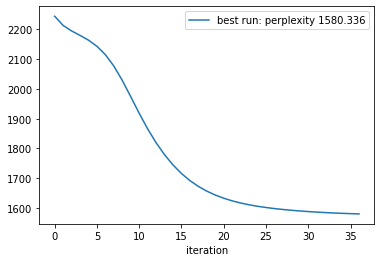

In [261]:
plsa = PLSA_plot(num_runs=10, stop=1e-5)
plsa.fit(document_term_train, num_classes=5);

В задании просят вывести топ-20 наиболее вероятных слов для каждой темы. Но эти слова наверняка будут 'работа', 'обязанности' и 'опыт', которые не несут в себе информации о теме вакансии. Более интересно увидеть характерные для темы слова. Но это тоже недостаточно хорошо - ведь даже если мы будем знать слово, которое дает нам точно указать тему документа, это знание будет бесполезным, если слово очень редкое. То есть мера полезности слова заключается в том, насколько высокую в среднем оценку вероятности темы для документа оно дает. Математически это выражается так:

$$
w_t = \arg\max\limits_w E \left(\hat P(t)\right) = \arg\max\limits_w \big( P(w)P(t|w) + (1-P(w))P(t) \big) = \\
=\arg\max\limits_w \big( P(t)P(w|t) - P(w)P(t) \big)
=\arg\max\limits_w \big( P(t)(P(w|t) - P(w)) \big)
$$

In [5]:
def describe_groups(plsa, num_characteristic_words = 20, num_job_names_in_title=5):
    p_d = einops.reduce(plsa.p_td, 't d -> d', 'sum')
    p_d /= p_d.sum()
    p_t = np.einsum('td, d -> t', plsa.p_td, p_d)
    p_w = np.einsum('wt, t -> w', plsa.p_wt, p_t)
    quality = np.einsum('t, wt -> wt', p_t, plsa.p_wt - einops.rearrange(p_w, 'w -> w ()'))

    top_k_indices = np.argsort(quality, axis=0)[-num_characteristic_words:]

    vacancies_names = vacancies.loc[vacancies_train.index]['name']
    columns = vacancies_names.groupby(plsa.p_td.argmax(axis=0)).agg(
        lambda x: ', '.join(x.value_counts().index[:num_job_names_in_title]))
    columns.name = 'Самые частые вакансии в группе'

    words = vectorizer.get_feature_names_out()
    topics = pd.DataFrame([[words[word_index] for word_index in row] for row in top_k_indices],
                             columns=columns).rename_axis('Характерные слова')
    return topics

In [264]:
describe_groups(plsa).style

Самые частые вакансии в группе,"Юрист, Бухгалтер, Юрисконсульт, Главный бухгалтер, Инженер ПТО","Полицейский, Машинист экскаватора, Охранник, Фасовщик, Фармацевт-провизор","Менеджер по продажам, Маркетолог, SMM-менеджер, Продавец-консультант, Контент-менеджер","Матрос, Системный администратор, Преподаватель английского языка, Программист 1С, Системный аналитик","Менеджер по продажам, Офис-менеджер, Торговый представитель, Менеджер по работе с клиентами, Менеджер по логистике"
Характерные слова,,,,,
0,строительный,оплата,ты,уровень,оформление
1,технологический,выплата,хороший,участие,обучение
2,проверка,отпуск,предлагать,приложение,оклад
3,составление,трудоустройство,готовый,разработчик,коммуникабельность
4,деятельность,смена,сотрудник,процесс,пользователь
5,объект,заработный,ваш,тестирование,корпоративный
6,обеспечение,плата,работать,данные,речь
7,предприятие,месяц,человек,поддержка,грамотный
8,образование,проживание,если,задача,персонал


Полученные группы можно кратко интерпретировать так:

1. Работа с документами
2. Разнорабочий
3. Сфера услуг, малый бизнес
4. Работа с компьютером
5. Менеджеры

**Задание 5 (1 балл)** 

Рассмотрите большее число тем (10, 20) и несколько различных начальных приближений. Проанализируйте результаты и ответьте на следующие вопросы: 

- Mожно ли сказать, что интерпретируемость каждой темы изменяется с ростом их числа?
- Устойчив ли алгоритм к начальному приближению на примере идентичности топовых слов в соответствующих темах?
- Отражает ли перплексия качество получаемых моделей? В чём заключается причина хорошего/плохого соответствия?

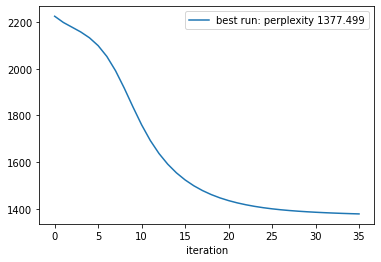

In [269]:
plsa = PLSA_plot(num_runs=10, stop=1e-5)
plsa.fit(document_term_train, num_classes=10);

In [270]:
describe_groups(plsa, num_characteristic_words=10, num_job_names_in_title=3).style

Самые частые вакансии в группе,"Маркетолог, Преподаватель английского языка, SMM-менеджер","Машинист экскаватора, Фасовщик, Кладовщик","Торговый представитель, Менеджер по продажам, Менеджер по персоналу","Бухгалтер, Главный бухгалтер, Заместитель главного бухгалтера","Инженер-конструктор, Лаборант, Инженер-технолог","Юрист, Юрисконсульт, Инженер ПТО","Мастер ногтевого сервиса, Менеджер по продажам, Продавец-консультант","Системный администратор, Программист 1С, Системный аналитик","Полицейский, Матрос, Фармацевт-провизор","Менеджер по продажам, Офис-менеджер, Менеджер по работе с клиентами"
Характерные слова,,,,,,,,,,
0,офис,заработный,рост,документ,обслуживание,контроль,который,тестирование,помощь,база
1,маркетинг,официальный,корпоративный,подготовка,качество,подготовка,если,процесс,ребёнок,продукт
2,реклама,плата,управление,формирование,эксплуатация,договор,это,данные,служба,услуга
3,сайт,трудоустройство,обучение,закупка,ремонт,строительство,команда,решение,бесплатный,офис
4,рекламный,день,торговый,бухгалтерский,технологический,документ,свой,технический,для,переговоры
5,для,график,рынок,отчётность,производственный,работа,что,проект,врач,речь
6,разработка,требование,продажа,знание,контроль,строительный,быть,знание,сертификат,грамотный
7,английский,обязанность,персонал,финансовый,производство,документация,мы,опыт,образование,менеджер
8,проект,условие,развитие,анализ,технический,объект,вы,разработка,отпуск,продажа


100%|███████████████████████████████████████████████████████████████| 10/10 [11:07<00:00, 66.80s/it]


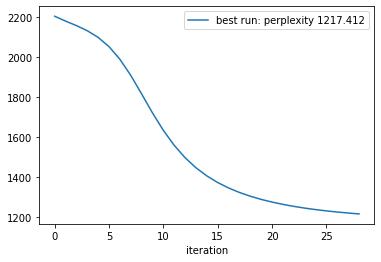

In [420]:
plsa = PLSA_plot(num_runs=10, stop=1e-4)
plsa.fit(document_term_train, num_classes=20);

In [423]:
describe_groups(plsa, num_characteristic_words=6, num_job_names_in_title=2).T.style

Характерные слова,0,1,2,3,4,5
Самые частые вакансии в группе,,,,,,
"Юрист, Юрисконсульт",правовой,подготовка,договор,английский,юридический,язык
"Лаборант, Специалист по охране труда",труд,контроль,безопасность,проведение,обеспечение,организация
"Системный администратор, Программист 1С",решение,проект,знание,опыт,разработка,система
"Полицейский, Охранник",плата,больничный,служба,соблюдение,контроль,отпуск
"Бухгалтер, Главный бухгалтер",финансовый,анализ,знание,бухгалтерский,отчётность,учёт
"Маркетолог, SMM-менеджер",анализ,маркетинг,сайт,проект,рекламный,разработка
"Машинист экскаватора, Фасовщик",день,оборудование,питание,вахта,проживание,работа
"Кладовщик, Бухгалтер",ответственность,условие,требование,обязанность,оформление,работа
"Матрос, Уборщик",страна,месяц,работодатель,счёт,контракт,для


100%|██████████████████████████████████████████████████████████████| 27/27 [53:50<00:00, 119.65s/it]


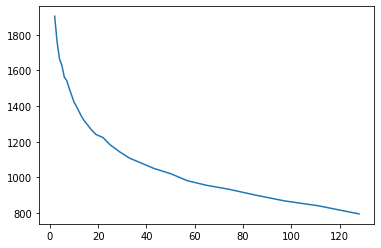

In [479]:
num_topics = sorted(set(map(int, np.logspace(1, 7, num=32, base=2))))
perplexities = []
plsa = PLSA(num_runs=1, stop=1e-4)

for t in tqdm(num_topics, position=0, ncols=100):
    plsa.fit(document_term_train, num_classes=t)
    perplexities.append(plsa.scores['perplexity'].iloc[-1])
    
plt.plot(num_topics, perplexities)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity');

 - Mожно ли сказать, что интерпретируемость каждой темы изменяется с ростом их числа?
 
Да, интерпретировать каждую тему становится проще, когда количество тем увеличивается - ведь тогда каждая тема становится конкретнее и ее проще описать. Интуитивно это тоже ожидаемо - ведь в пределе каждая тема состоит из одного документа и перекрытия между темами нет вообще.

- Устойчив ли алгоритм к начальному приближению на примере идентичности топовых слов в соответствующих темах?

In [595]:
words = []
for run in tqdm(range(10), position=0, ncols=100):
    plsa.fit(document_term_train, num_classes=20)
    words.append(describe_groups(plsa, num_characteristic_words=10))

100%|███████████████████████████████████████████████████████████████| 10/10 [09:47<00:00, 58.76s/it]


In [659]:
unique_words = [set(i.values.flat) for i in words]
shared_words = unique_words[0]
for uw in unique_words[1:]:
    shared_words = shared_words & uw
    
print('Share of common words in top words:', len(shared_words) / len(words[0].values.flat))

Share of common words in top words: 0.255


В качестве очень грубой оценки я взял общие слова среди 10 разных инициализаций разбиений на 20 классов. Получилось, что четверть слов являются основными и встречаются во всех разбиениях. В принципе это неплохо, но все равно видно, что результат сильно зависит от инициализации и требуются дальнейшие экспертные оценки.

- Отражает ли перплексия качество получаемых моделей? В чём заключается причина хорошего/плохого соответствия?

Перплексия больше отражает уверенность модели. Если считать перплексию на отложенной выборке, то она будет хорошо оценивать обобщающую способность модели. Также следует вместе с перплексией учитывать эффективную сложность модели (количество тем в данном случае) - хорошее соответствие будет, когда оба эти показатели малы.

## Кластеризация

**Задание 6 (2 балла)** 

В данном задание следуют сравнить между собой алгоритмы [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) и [Birch](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) используя подготовленные ранее данные.

Поэксперементируйте с различными способами векторизации текста, например можно:

- использовать только *name* / *description*, объединить их в один текст или сконкатенировать векторные представления,
- использовать представление в виде мешка слов или какую-либо его модификацию,
- сократить размерность векторного представления, используя PCA или векторные представления слов,

или сделать что-то более интересное, что вы придумаете!

Выберете лучшую комбинацию векторизации и алгоритма кластеризации и визуализируйте полученные кластеры (например, воспользовавшись облаком тегов, или предложите свой способ). Обоснуйте почему вы считаете, что выбранный вами подход для решения задачи кластеризации вакансий является лучшим.

---

Прежде чем начать сравнивать различные способы кластеризации, нужно определиться, как вообще сравнивать качество кластеризации. Если у нас есть размеченные данные, как в данном случае, то можно воспользоваться внешней для модели метрикой качества, такой как `correctness`: пусть $T(x),~L(x)$ - истинные и модельные метки кластеров объекта $x$, тогда 

$$\text{сorrectness}(T, L) = \sum_i\sum_{j<i}~[T(x_i) = T(x_j) \Leftrightarrow L(x_i) = L(x_j)]$$

Чтобы было проще интерпретировать значения этой метрики, можно ее нормализовать: 

$$Q(L) = \cfrac{\text{сorrectness}(T, L)}{\text{сorrectness}(T, T)}$$

Реализация:

In [6]:
def correctness(true_labels, labels):
    correctness = 0
    for true_label in set(true_labels):
        for label in set(labels):
            intersection = ((true_labels == true_label) & (labels == label)).sum()
            left = ((true_labels == true_label) & (labels != label)).sum()
            right = ((true_labels != true_label) & (labels == label)).sum()
            correctness += intersection * (intersection - 1) // 2 + left * right
    return correctness

def normalized_correctness(true_labels, labels):
    return correctness(true_labels, labels) / correctness(true_labels, true_labels)

Но не всегда у нас есть размеченные данные, и для полноты картины и обобщающей способности дальнейшего анализа, введем внутреннюю меру качества кластеризации. Но вопрос - какую? На ум приходит энтропия как мера неопределенности модельного распределения, но она определена только для дискретных случайных величин. Ну что же, давайте ограничимся пока дискретными переменными, посчитаем эмпирическую энтропию и попробуем обобщить на вещественные переменные.

Модель генерации одномерных дискретных кластерных данных выглядит так: выбирается случайный кластер $c$ из дискретного распределения $C \sim p_{clusters}$ и далее выбирается дискретное значение $x_c$ из распределения, соответствующего кластеру $c$: $X_c \sim p_c$, то есть общее распределение случайной величины $X \sim p$ есть смесь дискретных распределений $p_c$ с весами $p_{clusters}$. 
Энтропия такой смеси равна:

$$H(X) =\sum_x p(x)\log\left(\frac{1}{p(x)}\right) = -\sum_{x} \left(\sum_c p_{clusters}(c)p_c(x)\right)\log\left(\sum_c p_{clusters}(c)p_c(x)\right)$$

Если дополнительно предположить, что кластеры не пересекаются, энтропию можно расписать далее:

$$
H(X)= -\sum_c\sum_{x_c} p_{clusters}(c)p_c(x_c)\log\big(p_{clusters}(c)\big) -\sum_c\sum_{x_c} p_{clusters}(c)p_c(x_c) \log\big(p_c(x_c)\big)=\\
= -\sum_c p_{clusters}(c)\log\big(p(c)\big)\sum_{x_c}p_c(x_c) -\sum_c p_{clusters}(c)\sum_{x_c} p_c(x_c) \log\big(p_c(x_c)\big)=\\
= -\sum_c p_{clusters}(c)\log\big(p(c)\big) -\sum_c p_{clusters}(c)\sum_{x_c} p_c(x) \log\big(p_c(x_c)\big)=\\
= H(C) + E_c H(X_c)
$$

Полученная формула соответствует интуитивным ожиданиям того, как должна оцениваться кластеризация: каждый кластер вносит ошибку, пропорциональную размеру кластера и разбросу внутри кластера, но также учитывается разброс самих кластеров, чтобы штрафовать за слишком большое число кластеров. То есть энтропия хорошо работает с дискретными случайными переменными, но как ее обобщить на непрерывные переменные? Как выглядит формула для энтропии, выраженная через плотности распределений? Если просто провести аналогичные замены в формуле, получим:

$$H(X_{discrete}) = E\log\frac{1}{p(x)} = -\sum_{x}p(x)\log\big(p(x)\big) \longrightarrow
H(X_{continuous}) = E\log\frac{1}{f(x)} = -\int_{x\in R}f(x)\log\big(f(x)\big)dx$$

где $p(x)$ - вероятность, $f(x)$ - функция плотности. У такой версии непрерывной энтропии есть недостатки, например она может быть отрицательной, если функция плотности больше 1; непонятно, как ее интерпретировать, и она не инвариантна относительно биективных преобразований случайной величины, в отличие от дискретной энтропии. Продемонстрируем последнее:

Пусть $g$ - биективное преобразование множества значений $X_{discrete}$, тогда

$$H(g(X_{discrete})) = -\sum_{y \in X}p(g=y)\log\big(p(g=y)\big) = 
-\sum_{y=g(x) \in X}p(g=g(x))\log\big(p(g=g(x))\big) =\\
=-\sum_{x \in X_{discrete}}p(X_{discrete} = x)\log\big(p(X_{discrete}= x)\big)=-\sum_{x \in X_{discrete}}p(x)\log\big(p(x)\big) 
= H(X_{discrete})$$

Если же $g$ - гомеоморфизм вещественной оси, сохраняющий ориентацию, то

$$f_g(y) = \cfrac{d P(g < y)}{dy} = \cfrac{d P(g(x) < y)}{dy} = \cfrac{d P(x < g^{-1}(y))}{dy}=
\cfrac{d P(x < g^{-1}(y))}{d g^{-1}(y)}\cfrac{d g^{-1}(y)}{dy} =
f_x(g^{-1}(y))\cfrac{1}{g'(g^{-1}(y))}$$

И непрерывная энтропия равна

$$H(g(X_{continuous})) = -\int\limits_{y\in R}f_g(y)\log\big(f_g(y)\big)dy =\\
=-\int\limits_{y=g(x)\in R}\cfrac{f_x(g^{-1}(y))}{g'(g^{-1}(y))}\log\big(\cfrac{f_x(g^{-1}(y))}{g'(g^{-1}(y))}\big)dy 
=-\int\limits_{x\in R}\cfrac{f_x(x)}{g'(x)}\log\big(\cfrac{f_x(x)}{g'(x)}\big)g'(x)dx =\\
=-\int\limits_{x\in R}f_x(x)\log\big(f_x(x)\big)dx + \int\limits_{x\in R}f_x(x)\log\big(g'(x)\big)dx =\\
=H(X_{continuous}) + \int\limits_{x\in R}f_x(x)\log\big(g'(x)\big)dx
$$

Получаем, что $H(g(X_{continuous})) \neq H(X_{continuous})~\text{ в общем случае}$. Значит, нужно как-то модифицировать энтропию, чтобы она работала с непрерывными переменными. Если приглядеться, то можно увидеть, что энтропия очень похожа на дивергенцию Кульбака-Лейблера –– хорошо определенную меру, интерпретируемую как расстояние между распределениями, инвариантную относительно биективных преобразований соответствующих случайных величин, работающую со всеми видами распределений. Покажем связь энтропии и KL на примере $X$ –– ограниченной случайной величины и $Q$ –– равномерном на образе $X$ распределении: 

$$KL~(P_X||Q) = \int_x p(x)\log\left(\cfrac{p(x)}{q(x)}\right)dx = \int_x p(x)\log(|X|p(x))dx = \log|X| - H(X) \geq 0$$

В данной задаче KL можно интерпретировать как количество информации, которое привносит о данных распределение $P$ по сравнению с априорным $Q$. Но какое распределение брать в качестве $Q$, если множество значений $X$ не ограничено? В таком случае нет естественного априорного распределения, как равномерное для ограниченных распределений. Тут придется делать дополнительные предположения о структуре данных, то есть о конкретном параметрическом семействе распределений для каждого признака $i$. Например, категорийное семейство для категорийных признаков, нормальное для вещественных, биномиальное для счетных, или какое-либо более подходящее, исходя из наших знаний о данных. После выбора семейств в качестве $Q_i$ естественно взять распределения с параметрами максимального правдоподобия в модели без кластеризации. Тогда $KL$ можно интерпретировать, как то, насколько лучше кластерная модель описывает данные, чем базовая. Далее, чтобы посчитать $P_i$, опишем полную модель генерации многомерных кластерных данных:

1. Выбирается случайный кластер $c$ из дискретного распределения $C \sim p_{clusters}$
2. Для каждого признака $i$ объекта $x$ независимо выбирается значение $x_{ci}$ из распределения $X_{ci} \sim p_{ci}$

Тогда теоретически $KL(P||Q)$ расписывается так:

$$P(x) = \sum_c p_{clusters}(c)p_{c}(x) = \sum_c p_{clusters}(c) \prod_i p_{ci}(x^i)$$

$$Q(x) = \prod_i q_i(x^i)$$

$$KL(P||Q) = \int_x P(x)\log\cfrac{P(x)}{Q(x)}dx = \int_x \left(\sum_c p_{clusters}(c)p_{c}(x)\right)\log\cfrac{\left(\sum_c p_{clusters}(c)p_{c}(x)\right)}{\prod_i q_i(x^i)}dx $$

Если предположить, что кластеры не перескаются, то есть что существует такое отображение $x \rightarrow c_x \in C: p_c(x) \neq 0 \Leftrightarrow c = c_x$:

$$P(x) = p_{clusters}(c_x) p_{c_x}(x) = \sum_c p_{clusters}(c)p_{c}(x),$$

$$KL(P||Q) = 
\int\limits_{x} p_{clusters}(c_x)p_{c_x}(x)\log\cfrac{p_{clusters}(c_x)p_{c_x}(x)}{Q(x)}dx =\\
=\sum_c\int\limits_{x} p_{clusters}(c)p_{c}(x)\log\cfrac{p_{clusters}(c)p_{c}(x)}{Q(x)}dx =\\
=\sum_c p_{clusters}(c)\log p_{clusters}(c)\int\limits_{x}p_c(x)dx +
\sum_c p_{clusters}(c)\int\limits_{x}p_c(x)\log\cfrac{p_c(x)}{Q(x)}dx =\\
=\sum_c p_{clusters}(c)\log p_{clusters}(c) + E_c\int\limits_{x}\prod_i p_{ci}(x^i)\log\cfrac{\prod_i p_{ci}(x^i)}{\prod_i q_i(x^i)}dx =\\
=-H(C)+ E_c\int_{x}\left(\sum_j\log\cfrac{p_{cj}(x^j)}{q_j(x^j)}\right)\left(\prod_i p_{ci}(x^i)\right)dx =\\
=- H(C)+ E_c~\sum_j\left(\int_{x^j}\log\cfrac{p_{cj}(x^j)}{q_j(x^j)}p_{cj}(x^j)dx^j\right)\left(\prod_{i\neq j}\int_{x^i}p_{ci}(x^i)dx^i\right) =\\
=- H(C)+ E_c~\sum_j\int_{x^j}p_{cj}(x^j)\log\cfrac{p_{cj}(x^j)}{q_j(x^j)}dx^j=\\
= E_c~\sum_i KL(p_{ci}||q_i) - H(C)
$$

Если считать, что чем больше $KL(P||Q)$, тем лучше, то можно сказать, что нас интересует разбиение на кластеры, распределение внутри которых максимально отличается от общего: $KL(p_{ci}||q_i) \rightarrow \max$, причем число кластеров $\approx H(C)$ не должно быть слишком большим, что опять же интуитивно обосновано. Но на практике предположение о том, что многомерные кластеры независимых признаков не пересекаются слишком сильное, и у нас остается логарифм суммы и кратный интеграл не распадается. Чтобы не иметь дело с кратным интегралом, тем более что признаки могут быть как категорийными, так и вещественными, возьмем следующее приближение KL:

$$\text{Cluster_quality}(L) = \sum_i w_i KL_i = \sum_i w_iKL(p_i||q_i)$$

$$p_i(x^i) = \sum_c p_{clusters}(c) p_{ci}(x^i)$$

$$w \text{ –– нормированные веса важности признаков}$$

На практике параметры для распределений $p_{clusters}, p_{ci}$ и $q_i$ подсчитываются исходя из максимального правдоподобия, а $KL_i$ считается как интеграл для непрерывных признаков и как сумма для категорийных. Приступим к реализации:


In [7]:
def stable_log(x):
    return np.log(x + np.finfo(float).eps)

def categorical_mle_pmf(categorical_sample: "pd.Series") -> "pd.Series":
    '''Returns maximum likelihood categorical probability mass function'''
    
    return categorical_sample.value_counts() / categorical_sample.count()

def kl_discrete(p_pmf: "pd.Series", q_pmf: "pd.Series") -> "float":
    '''Returns Kullback-Leibler divergence KL(P||Q) for two probability mass functions'''
    
    return np.sum(p_pmf * (stable_log(p_pmf) - stable_log(q_pmf)))

class NormalPDF:
    '''Normal probability density function'''
    
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        
    def __call__(self, x):
        return scipy.stats.norm.pdf(x, loc=self.mean, scale=self.std)
    
def normal_mle_pdf(numeric_sample: pd.Series, default_mean=0, default_std=1) -> "NormalPDF":
    '''Returns maximum likelihood normal probability density function'''
    
    mean = numeric_sample.mean()
    mean = default_mean if np.isnan(mean) else mean
    std = numeric_sample.std(ddof=0)
    std = default_std if std == 0 or np.isnan(std) else std
    return NormalPDF(mean, std)

def get_mixture_of_pdfs(pdfs: "pd.Series", weights: "pd.Series"):
    '''Returns mixture of pdfs with provided weights'''
    
    def mixture_of_pdfs(x):
        return sum(weights[label] * pdf(x) for label, pdf in pdfs.iteritems())
    
    return mixture_of_pdfs
    
def get_integration_limits(normal_pdfs, radius_to_sigma_ratio=3):
    '''Returns practical integration limits for set of normal probability density functions'''
    
    radius = radius_to_sigma_ratio * max(p.std for p in normal_pdfs)
    integrate_from = min(p.mean for p in normal_pdfs) - radius
    integrate_to = max(p.mean for p in normal_pdfs) + radius
    return integrate_from, integrate_to
    
def kl_continuous(p_pdf, q_pdf, integrate_from=-np.inf, integrate_to=np.inf) -> "float":
    '''Returns Kullback-Leibler divergence KL(P||Q) for two probability density functions'''
        
    def relative_entropy(x):
        return p_pdf(x) * (stable_log(p_pdf(x)) - stable_log(q_pdf(x)))
    
    kl, error = scipy.integrate.quad(relative_entropy, a=integrate_from, b=integrate_to)
    return kl

def clusterization_quality(sample: "pd.DataFrame", labels: "pd.Series", weights: "np.array"=None) -> "float":
    '''Returns clusterization quality based on Kullback-Leibler divergence'''
        
    sample = sample.loc[labels.index]
    sample = sample.select_dtypes(['category', 'float'])
    if weights is None:
        weights = np.ones(n_features:=len(sample.columns)) / n_features
    labels.name = 'labels'
    p_clusters = categorical_mle_pmf(labels)
    quality = 0
    
    for (feature_name, feature_sample), w_i in zip(sample.iteritems(), weights):
        if pd.api.types.is_categorical_dtype(feature_sample):
            q_i = categorical_mle_pmf(feature_sample)
            p_i = (
                feature_sample
                .groupby(labels)
                .apply(categorical_mle_pmf)
                .groupby(level=1)
                .agg(lambda p_ci: np.sum(p_ci.droplevel(1) * p_clusters))
            )
            quality += w_i * kl_discrete(p_i, q_i)
            
        elif pd.api.types.is_float_dtype(feature_sample):
            q_i = normal_mle_pdf(feature_sample)
            p_ci = (
                feature_sample
                .groupby(labels)
                .apply(lambda cluster_i: normal_mle_pdf(cluster_i, default_mean=q_i.mean, default_std=q_i.std))
            )
            integrate_from, integrate_to = get_integration_limits(list(p_ci) + [q_i])
            p_i = get_mixture_of_pdfs(p_ci, weights=p_clusters)
            quality += w_i * kl_continuous(p_i, q_i, integrate_from, integrate_to)
            
    return quality

In [824]:
quality = clusterization_quality(vacancies, vacancies.loc[test_index]['category'])
print(f"Clusterization quality of provided labels: {quality:.5f}")

Clusterization quality of provided labels: 0.04582


Хорошо, теперь мы можем сравнивать модели с помощью `correctness` и `clusterization_quality`, но все же хочется посмотреть на то, как устроен каждый кластер. Для этого нам понадобится следующая функция:

In [297]:
def describe(sample: "pd.DataFrame", labels: "pd.Series",
             topk_groups=None, topk_names=3, topk_skills=3, description_char_limit=100):
    '''
    Prints description of clusters
    
    :param sample: dataframe with sample data
    :param labels: labels series with indices corresponding to sample dataframe
    :param topk_groups: number of groups to include in the table
    :param topk_names: number of profession names to include
    :param topk_skills: number of key skills names to include
    '''
    
    def mode(series):
        return series.mode()[0]
    
    def density(series):
        return (series == mode(series)).mean()
    
    def entropy(series):
        probs = series.value_counts()
        probs /= probs.sum()
        return np.sum(-probs * stable_log(probs))
    
    df = sample.loc[labels.index]
    df['salary_from'] = df['salary_from'].where(df['salary_currency'] == 'RUR', None)
    df['experience_id'] = df['experience_id'].cat.rename_categories({
        'noExperience': 0,
        'between1And3': 2,
        'between3And6': 4,
        'moreThan6': 6
    }).astype(float)
    df_categorical = df.select_dtypes(['category'])
    df_continuous = df.select_dtypes(['float'])
    df = df.groupby(labels).aggregate(**{
        'size':('name', 'count'),
        'name': ('name', lambda s: ', '.join(s.value_counts().index[:topk_names])[:description_char_limit]),
        'skills': (
            'key_skills',
            lambda s: ', '.join(pd.Series(s.str.cat().split('\t')).value_counts().index[:topk_skills])[:description_char_limit]
        ),
        'salary_from': ('salary_from', 'mean'),
        'salary_to': ('salary_to', 'mean'),
        'experience_years': ('experience_id', mode),
        'schedule_id': ('schedule_id', mode),
        'employment_id': ('employment_id', mode),
        'accept_handicapped': ('accept_handicapped', mode),
        'accept_kids': ('accept_kids', mode),
    })
    
    def kl_disc(x: "pd.DataFrame") -> float:
        x = x.apply(categorical_mle_pmf)
        q_is = df_categorical.apply(categorical_mle_pmf)
        return sum(kl_discrete(x[feature], q_is[feature]) for feature in df_categorical)
    
    def kl_cont(x: "pd.DataFrame") -> float:
        x = x.apply(normal_mle_pdf)
        q_is = df_continuous.apply(normal_mle_pdf)
        return sum(kl_continuous(x[feature], q_is[feature], *get_integration_limits([x[feature], q_is[feature]]))
                for feature in df_continuous)
        
    cluster_cohesion = df_categorical.groupby(labels).apply(kl_disc).rename('cluster_cohesion')
    cluster_cohesion += df_continuous.groupby(labels).apply(kl_cont)
    cluster_cohesion /= len(df_categorical.columns) + len(df_continuous.columns)
    df = (
        pd.
        concat([cluster_cohesion, df], axis=1)
        .rename_axis('labels')
        .sort_values('size', ascending=False)
        .rename(columns=lambda name: name.replace('_', '\n'))
        .head(topk_groups)
    )

    def highlight_anomaly(series, props=''):
        return np.where(series != mode(series), props, '')
    
    styler = (
        df
        .style
        .format(precision=0, thousands="&nbsp;")
        .format(precision=4, subset=df.columns[0])
        .background_gradient(cmap='coolwarm', low=.75, high=.5)
        .apply(highlight_anomaly, props='background-color:orange', subset=df.columns[-4:])
    )
    
    return styler

Кластеры из предоставленных меток:

In [9]:
describe(vacancies, vacancies.iloc[test_index]['category'])

,cluster cohesion,size,name,skills,salary from,salary to,experience years,schedule id,employment id,accept handicapped,accept kids
labels,,,,,,,,,,,
8.0,0.4129,800,"Менеджер по продажам, Торговый представитель, Продавец-консультант","Активные продажи, Ведение переговоров, Поиск и привлечение клиентов",45 066,118 111,2,fullDay,full,False,False
0.0,0.4432,768,"Системный администратор, Системный аналитик, Программист 1С","CSS, Git, HTML",68 514,125 390,2,fullDay,full,False,False
9.0,0.4324,763,"Инженер-конструктор, Технолог, Менеджер по закупкам","Пользователь ПК, Работа в команде, Контроль качества",45 718,61 269,2,fullDay,full,False,False
20.0,0.5825,603,"Машинист экскаватора, Фасовщик, Уборщик","Ремонтные работы, Монтаж оборудования, Работа в команде",49 427,58 432,0,flyInFlyOut,full,False,False
12.0,0.5144,431,"Инженер ПТО, Геодезист, Архитектор","Строительство, AutoCAD, Проектная документация",57 385,89 295,4,fullDay,full,False,False
13.0,0.5626,383,"Матрос, Кладовщик, Водитель-экспедитор","Пользователь ПК, Работа в команде, Деловая переписка",45 686,61 725,2,fullDay,full,False,False
4.0,0.5700,378,"Фармацевт-провизор, Лаборант, Фармацевт","Медицинская документация, Грамотная речь, Работа в команде",42 127,72 560,0,fullDay,full,False,False
14.0,0.5876,336,"Шеф-повар, Повар, Су-шеф","Работа в команде, Грамотная речь, Пользователь ПК",38 178,90 725,2,fullDay,full,False,False
21.0,0.5821,328,"Маркетолог, Контент-менеджер, SMM-менеджер","Продвижение бренда, Медиапланирование, Планирование маркетинговых кампаний",40 518,62 235,2,fullDay,full,False,False


In [10]:
def evaluate(model, test_data, n_clusters=10):
    '''Returns quality and correctness on provided test dataset corresponding to test index'''
    
    model.fit(test_data)
    labels = pd.Series(model.labels_, index=test_index)
    outliers = labels.value_counts().index[n_clusters:]
    labels[labels.isin(outliers)] = -1
    quality = clusterization_quality(vacancies, labels)
    correctness = normalized_correctness(true_labels=vacancies.iloc[test_index]['category'], labels=labels)
    return {'quality': quality, 'correctness': correctness, 'labels': labels}

def print_results(results):
    print(f"{results['quality']:.5f}\t clusterization quality\n"
          f"{results['correctness']:.5f}\t normalized correctness")
    
    return describe(vacancies, results['labels'])

In [11]:
from sklearn.cluster import KMeans, DBSCAN, Birch

kmeans = KMeans(n_clusters=10)
kmean_results = evaluate(kmeans, test_data=scipy.sparse.csr_matrix(document_term_test))
print_results(kmean_results)

0.01896	 clusterization quality
0.80519	 normalized correctness


,cluster cohesion,size,name,skills,salary from,salary to,experience years,schedule id,employment id,accept handicapped,accept kids
labels,,,,,,,,,,,
6,0.1037,2 485,"Матрос, Полицейский, Офис-менеджер","Пользователь ПК, Грамотная речь, Работа в команде",40 620,70 110,2,fullDay,full,False,False
9,0.2312,1 049,"Фасовщик, Машинист экскаватора, Юрист","Пользователь ПК, Работа в команде, Грамотная речь",46 274,64 267,2,fullDay,full,False,False
5,0.1957,1 044,"Маркетолог, Полицейский, Продавец-консультант","Грамотная речь, Работа в команде, Пользователь ПК",44 361,107 035,2,fullDay,full,False,False
2,0.3148,573,"Менеджер по продажам, Менеджер по оптовым продажам, Менеджер активных продаж","Активные продажи, Ведение переговоров, Поиск и привлечение клиентов",50 522,110 443,2,fullDay,full,False,False
4,0.3743,489,"Инженер ПТО, Инженер-конструктор, Шеф-повар","Пользователь ПК, Контроль качества, AutoCAD",53 420,71 105,4,fullDay,full,False,False
7,0.3014,422,"Маркетолог, Менеджер по подбору персонала, Системный администратор","Работа в команде, Пользователь ПК, Ведение переговоров",44 858,68 325,2,fullDay,full,False,False
3,0.5332,417,"Системный аналитик, Программист 1С, Java-разработчик","Git, SQL, MySQL",83 749,110 381,2,fullDay,full,False,False
1,0.4086,358,"Юрист, Юрисконсульт, Главный бухгалтер","Деловая переписка, Составление договоров, Договорная работа",50 149,81 659,2,fullDay,full,False,False
0,0.5297,165,"Инженер ПТО, Буровой мастер геологоразведочного участка (пневмоударное RC- бурение), Инженер по нала","Строительство, AutoCAD, Организаторские навыки",71 737,114 983,4,fullDay,full,False,False


Для dbscan нужно подобрать гиперпараметры `eps` и `min_samples`. Возьмем небольшую долю выборки и построим графики  соответствия "объект –– расстояние до k-ого соседа" для разных k:

In [1200]:
m_values = range(3, 12)
sample_fraction = 0.05

n = document_term.shape[0]
sample_ids = np.random.choice(range(n), int(n * sample_fraction), replace=False)
sample = np.array(document_term_train.tocsr()[sample_ids])
kdtree = scipy.spatial.KDTree(sample)

neighbours = []
for document in tqdm_(sample):
    distances, indices = kdtree.query(document, m_values)
    neighbours.append(distances)
    
neighbours = np.array(neighbours).sort(axis=0)

100%|███████████████████████████████████████████████████████████| 3214/3214 [05:57<00:00,  8.99it/s]


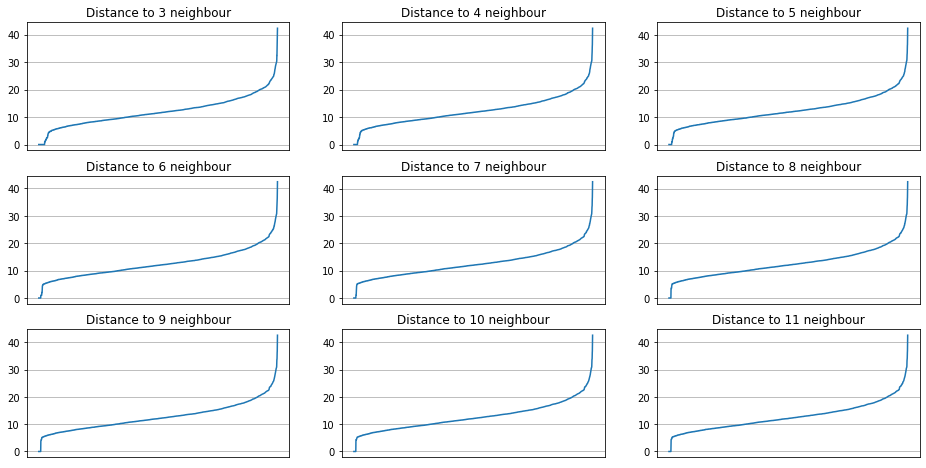

In [1201]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

for ax, m_value, e_values in zip(axes.flat, m_values, neighbours.T):
    ax.plot(e_values)
    ax.set_title(f'Distance to {m_value} neighbour')
    ax.grid(True, axis='y')
    ax.set_xticks([])

Отсюда мы получаем верхнюю оценку в 20 на `eps` параметр, поскольку в полной выборке объекты будут расположены более плотно. Проведем grid search по `eps` от 2 до 20:

In [264]:
def enumerate_epsilon(data, epsilons, min_samples):
    value_counts = []
    for eps in tqdm(epsilons, position=0, ncols=100):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        dbscan.fit(data)
        value_counts.append(pd.Series(dbscan.labels_).value_counts())

    df = pd.concat(value_counts, axis=1).sort_index()
    df.columns = epsilons
    df = df.rename_axis('cluster_size').rename_axis(f"DBSCAN: min_samples={min_samples}, eps:", axis=1)
    return df

In [1270]:
df = enumerate_epsilon(data=coo_matrix(document_term_train), epsilons=range(2, 21, 2), min_samples=5)

100%|███████████████████████████████████████████████████████████████| 10/10 [08:54<00:00, 53.41s/it]


In [1272]:
df[:10].style

"DBSCAN: min_samples=5, eps:",2,4,6,8,10,12,14,16,18,20
cluster_size,,,,,,,,,,
-1,58203.000000,56993,51880.000000,42778.000000,32246.000000,21912.000000,13847.000000,8212.000000,4539.000000,2438.000000
0,5.000000,5,5.000000,15841.000000,27990.000000,39977.000000,49146.000000,55427.000000,59410.000000,61702.000000
1,165.000000,165,5050.000000,5.000000,5.000000,5.000000,16.000000,7.000000,7.000000,7.000000
2,7.000000,7,165.000000,7.000000,16.000000,16.000000,7.000000,14.000000,5.000000,24.000000
3,5.000000,5,7.000000,9.000000,343.000000,343.000000,34.000000,5.000000,8.000000,5.000000
4,93.000000,228,5.000000,16.000000,22.000000,8.000000,7.000000,7.000000,16.000000,9.000000
5,14.000000,5,248.000000,28.000000,8.000000,7.000000,7.000000,5.000000,16.000000,5.000000
6,12.000000,15,5.000000,17.000000,9.000000,13.000000,5.000000,7.000000,24.000000,5.000000
7,6.000000,12,16.000000,322.000000,7.000000,11.000000,6.000000,5.000000,6.000000,8.000000


Из этой таблицы видно, что при увеличении `eps` объекты плавно переходят из категорию выбросов в один большой кластер, и при данном представлении данных dbscan не способен расчленить выборку. В качестве компромисса возьмем `eps`=10.

In [12]:
%%time
dbscan = DBSCAN(eps=10, min_samples=5, n_jobs=-1)
dbscan_results = evaluate(dbscan, test_data=scipy.sparse.csr_matrix(document_term_test))
print_results(dbscan_results)

0.00063	 clusterization quality
0.51211	 normalized correctness
CPU times: user 55.2 s, sys: 2.44 s, total: 57.7 s
Wall time: 47.8 s


,cluster cohesion,size,name,skills,salary from,salary to,experience years,schedule id,employment id,accept handicapped,accept kids
labels,,,,,,,,,,,
-1,0.0570,4 061,"Менеджер по продажам, Маркетолог, Юрист","Работа в команде, Пользователь ПК, Ведение переговоров",50 894,90 815,2,fullDay,full,False,False
0,0.0838,2 993,"Менеджер по продажам, Офис-менеджер, Фасовщик","Пользователь ПК, Грамотная речь, Работа в команде",41 043,73 276,2,fullDay,full,False,False
3,1.5689,42,"Матрос, Уборщик, Кухонный рабочий",,nan,1 290,0,flyInFlyOut,full,False,False
14,1.0865,17,"Продавец-консультант, Менеджер по продажам, Менеджер по продажам в салон",,37 124,nan,0,fullDay,full,False,False
13,1.9491,11,"Оператор саll-центра, Оператор колл-центра (исходящие звонки)",,nan,nan,0,remote,part,True,False
16,1.1176,11,"Заместитель директора офиса по обслуживанию клиентов (Пойковский), Специалист по обслуживанию физиче","Управление продажами, Мотивация персонала, Управление командой",40 000,100 000,2,fullDay,full,False,False
5,1.2068,8,"Ночной Товаровед м. Проспект Просвещения, Продавец-консультант (м. Щелковска⁢я/Хабаровская улица), К",,37 667,40 250,0,shift,full,False,False
8,1.8656,7,Водитель автобуса,,nan,nan,0,shift,full,True,False
9,1.6426,7,"Полицейский (Москва), Полицейский","Обучение и развитие, Грамотная речь, Виды страхования",40 000,nan,0,shift,full,False,False


In [13]:
%%time
birch = Birch(n_clusters=10)
birch_results = evaluate(birch, test_data=document_term_test.toarray())
print_results(birch_results)

0.01980	 clusterization quality
0.79354	 normalized correctness
CPU times: user 12min 11s, sys: 6min 53s, total: 19min 5s
Wall time: 3min 49s


,cluster cohesion,size,name,skills,salary from,salary to,experience years,schedule id,employment id,accept handicapped,accept kids
labels,,,,,,,,,,,
7,0.1796,2 461,"Матрос, Машинист экскаватора, Фасовщик","Пользователь ПК, Работа в команде, Грамотная речь",41 750,58 798,2,fullDay,full,False,False
1,0.1338,1 685,"Полицейский, Офис-менеджер, Маркетолог","Грамотная речь, Пользователь ПК, Работа в команде",45 796,91 113,2,fullDay,full,False,False
6,0.2823,613,"Продавец-консультант, Менеджер по продажам, Оператор саll-центра","Работа в команде, Пользователь ПК, Навыки продаж",38 800,85 013,0,fullDay,full,False,False
4,0.4285,548,"Маркетолог, Системный аналитик, Программист 1С","Git, HTML, JavaScript",71 487,103 453,2,fullDay,full,False,False
2,0.4763,511,"Менеджер по продажам, Торговый представитель, Кредитный специалист","Активные продажи, Поиск и привлечение клиентов, Ведение переговоров",50 790,143 489,2,fullDay,full,False,False
3,0.3349,496,"Системный администратор, Специалист по охране труда, Технолог","Пользователь ПК, Контроль качества, AutoCAD",53 110,74 454,2,fullDay,full,False,False
8,0.3961,459,"Юрист, Главный бухгалтер, Юрисконсульт","Составление договоров, Деловая переписка, 1С: Предприятие 8",47 840,75 625,2,fullDay,full,False,False
0,0.3823,258,"Менеджер по продажам, Менеджер по оптовым продажам, Руководитель отдела продаж","Ведение переговоров, Поиск и привлечение клиентов, Активные продажи",54 038,131 294,2,fullDay,full,False,False
9,0.6109,117,"Инженер ПТО, Прораб отделочных работ, Геодезист","Строительство, AutoCAD, Проектная документация",70 779,102 977,4,fullDay,full,False,False


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import torchtext

In [15]:
count_vectorizer_short = CountVectorizer(max_df=0.95, min_df=20, max_features=100)
document_term_test_short = count_vectorizer_short.fit_transform(documents_test).toarray()

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=20)
tfidf_test = tfidf_vectorizer.fit_transform(documents_test).toarray()

tfidf_vectorizer_short = TfidfVectorizer(max_df=0.95, min_df=20, max_features=100)
tfidf_test_short = tfidf_vectorizer_short.fit_transform(documents_test).toarray()

pca = PCA(n_components=100)
pca_bag_test = pca.fit_transform(document_term_test.toarray())
pca_tfidf_test = pca.fit_transform(tfidf_test)

fast_text = torchtext.vocab.FastText(language='ru')
vocabulary = pd.Series(count_vectorizer.vocabulary_).sort_values().index
embeddings = np.array([fast_text[word].numpy() for word in vocabulary])
fast_text_test = document_term_test.toarray() @ embeddings

In [229]:
datasets = pd.Series({
    f"Bag of words, {document_term_test.shape[1]}": document_term_test.toarray(),
    f"Bag of words, {document_term_test_short.shape[1]}": document_term_test_short,
    f"Tf-Idf, {tfidf_test.shape[1]}": tfidf_test,
    f"Tf-Idf, {tfidf_test_short.shape[1]}": tfidf_test_short,
    f"PCA from bag of words, {pca_bag_test.shape[1]}": pca_bag_test,
    f"PCA from Tf-Idf, {pca_tfidf_test.shape[1]}": pca_tfidf_test,
    f"Fast text embeddings, {fast_text_test.shape[1]}": fast_text_test,
})

In [230]:
models = pd.Series({
    'KMeans': kmeans,
    'DBSCAN': dbscan,
    'BIRCH': birch
})

In [236]:
comparison = pd.DataFrame(
    index=pd.MultiIndex.from_product([datasets.index, models.index], names=['dataset', 'model']),
    columns=['quality', 'correctness']
)

Опять, чтобы сравнить DBSCAN, нужно подбирать `eps` для каждого датасета:

In [292]:
enumerate_epsilon(tfidf_test, epsilons=np.logspace(-0.5, 0.5, num=10), min_samples=5)[:5]

100%|███████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.21s/it]


"DBSCAN: min_samples=5, eps:",0.316228,0.408424,0.527500,0.681292,0.879923,1.136464,1.467799,1.895736,2.448437,3.162278
cluster_size,,,,,,,,,,
-1,6901.0,6873.0,6862.0,6809.0,6636,2569.0,NaN,NaN,NaN,NaN
0,23.0,23.0,23.0,25.0,60,4006.0,7164.0,7164.0,7164.0,7164.0
1,6.0,6.0,6.0,6.0,6,9.0,NaN,NaN,NaN,NaN
2,6.0,5.0,5.0,5.0,5,8.0,NaN,NaN,NaN,NaN
3,5.0,6.0,6.0,6.0,9,146.0,NaN,NaN,NaN,NaN


In [288]:
enumerate_epsilon(pca, epsilons=np.logspace(-0.5, 0, num=10), min_samples=5)[:5]

100%|███████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.12s/it]


"DBSCAN: min_samples=5, eps:",0.316228,0.359381,0.408424,0.464159,0.527500,0.599484,0.681292,0.774264,0.879923,1.000000
cluster_size,,,,,,,,,,
-1,6870.0,6861.0,6836.0,6806.0,6764.0,6610.0,6004,4077.0,754.0,NaN
0,23.0,23.0,23.0,26.0,30.0,45.0,6,30.0,6397.0,7164.0
1,6.0,6.0,6.0,6.0,6.0,6.0,159,2825.0,7.0,NaN
2,5.0,5.0,5.0,5.0,5.0,5.0,83,6.0,6.0,NaN
3,6.0,6.0,6.0,6.0,6.0,9.0,6,6.0,NaN,NaN


In [299]:
enumerate_epsilon(pca_bag_test, epsilons=np.logspace(0, 1, num=10), min_samples=5)[:5]

100%|███████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.16it/s]


"DBSCAN: min_samples=5, eps:",1.000000,1.291550,1.668101,2.154435,2.782559,3.593814,4.641589,5.994843,7.742637,10.000000
cluster_size,,,,,,,,,,
-1,6916.0,6892.0,6803,6596.0,6182.0,5480.0,4503.0,3041.0,1610.0,534.0
0,23.0,23.0,23,281.0,690.0,1442.0,2470.0,3964.0,5457.0,6571.0
1,5.0,5.0,6,23.0,23.0,23.0,6.0,6.0,6.0,43.0
2,6.0,6.0,6,6.0,6.0,6.0,5.0,42.0,42.0,5.0
3,5.0,5.0,5,5.0,5.0,5.0,6.0,5.0,7.0,5.0


In [301]:
enumerate_epsilon(pca_tfidf_test, epsilons=np.logspace(-0.5, 0, num=10), min_samples=5)[:5]

100%|███████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.05it/s]


"DBSCAN: min_samples=5, eps:",0.316228,0.359381,0.408424,0.464159,0.527500,0.599484,0.681292,0.774264,0.879923,1.000000
cluster_size,,,,,,,,,,
-1,5681,3768,1325.0,159.0,4.0,NaN,NaN,NaN,NaN,NaN
0,594,2350,5480.0,6872.0,7056.0,7115.0,7121.0,7164.0,7164.0,7164.0
1,52,12,60.0,5.0,43.0,43.0,43.0,NaN,NaN,NaN
2,25,66,6.0,43.0,7.0,6.0,NaN,NaN,NaN,NaN
3,25,25,11.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN


In [300]:
enumerate_epsilon(fast_text_test, epsilons=np.logspace(1, 3, num=10), min_samples=5)[:5]

100%|███████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.08s/it]


"DBSCAN: min_samples=5, eps:",10.000000,16.681005,27.825594,46.415888,77.426368,129.154967,215.443469,359.381366,599.484250,1000.000000
cluster_size,,,,,,,,,,
-1,6945.0,6923.0,6553,4935.0,1873.0,270.0,23.0,2.0,1.0,NaN
0,23.0,23.0,23,2017.0,5216.0,6884.0,7141.0,7162.0,7163.0,7164.0
1,6.0,5.0,6,6.0,6.0,5.0,NaN,NaN,NaN,NaN
2,5.0,6.0,340,5.0,7.0,5.0,NaN,NaN,NaN,NaN
3,26.0,5.0,6,6.0,5.0,NaN,NaN,NaN,NaN,NaN


In [327]:
dbscan_eps = dict(zip(datasets.index, [10, 10, 1, 0.75, 6, 0.35, 50]))

for dataset_name, model_name in tqdm_(comparison.index):
    dataset = datasets[dataset_name]
    if model_name == 'DBSCAN':
        model = DBSCAN(eps=dbscan_eps[dataset_name], min_samples=5, n_jobs=-1)
    else:
        model = models[model_name]
    results = evaluate(model, dataset)
    comparison.loc[dataset_name, model_name] = results['quality'], results['correctness']

100%|███████████████████████████████████████████████████████████████| 21/21 [16:52<00:00, 48.24s/it]


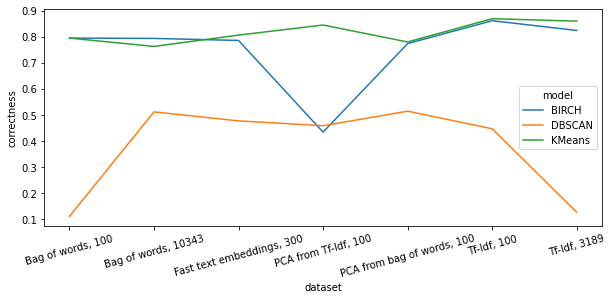

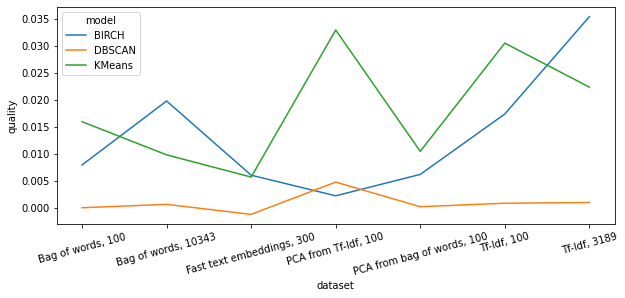

In [390]:
df = comparison.reset_index().pivot(index='dataset', columns='model')
df['correctness'].plot(figsize=(10, 4), rot=15, ylabel='correctness')
df['quality'].plot(figsize=(10, 4), rot=15, ylabel='quality');

Отбросим DBSCAN - он показывает плохие результаты и нужно возиться с гиперпараметрами и обрабатывать его метки, чтобы извлечь топ 10 кластеров. Видимо, он особо плохо работает с многомерными данными и к нашей задаче не подходит. Попробуем обогатить Tf-Idf векторы данными из других столбцов таблицы `vacancies`:

**Задание "со звездочкой" (1 балл)** 

Попробуйте обогатить векторное представление полученное из текстов другими признаками из таблицы `vacancies.csv` и добиться лучшей интерпретируемости кластеров.

In [10]:
%%time
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

class Embedding:
    def __init__(self):
        self.embeddings = []
        
    def append(self, embedding: "np.array", importance: "float"):
        scaler = StandardScaler()
        embedding = scaler.fit_transform(embedding)
        embedding *= importance / np.sqrt(embedding.shape[1])
        self.embeddings.append(embedding)
        
    def get(self):
        return pd.DataFrame(np.concatenate(self.embeddings, axis=1), index=vacancies.index)
    
apriori_importance = {
    'name': 1,
    'description': 1,
    'key_skills': 1,
    'schedule_id': 1,
    'employment_id': 1,
    'experience_id': 1,
    'accept_handicapped': 1,
    'accept_kids': 1,
    'salary_from': 1,
    'salary_to': 0.5,
    'salary_gross': 0.5,
    'salary_currency': 1,
    'area_id': 1,
    'employer_id': 1,
    'type_id': 0.5,
    'created_at': 1,
    'published_at': 1
}
embedding = Embedding()

tfidf_vectorizer = TfidfVectorizer(max_features=50)
embedding.append(
    tfidf_vectorizer.fit_transform(vacancies_text['name'].fillna('')).toarray(),
    importance=apriori_importance['name']
)

tfidf_vectorizer = TfidfVectorizer(max_features=100)
embedding.append(
    tfidf_vectorizer.fit_transform(vacancies_text['description'].fillna('')).toarray(),
    importance=apriori_importance['description']
)

tfidf_vectorizer = TfidfVectorizer(max_features=50)
embedding.append(
    tfidf_vectorizer.fit_transform(vacancies_text['key_skills'].fillna('')).toarray(),
    importance=apriori_importance['key_skills']
)

embedding.append(
    pd.get_dummies(vacancies['schedule_id']).to_numpy(),
    importance=apriori_importance['schedule_id']
)

embedding.append(
    pd.get_dummies(vacancies['employment_id']).to_numpy(),
    importance=apriori_importance['employment_id']
)

ordinal_encoder = OrdinalEncoder(
    categories=[['noExperience', 'between1And3', 'between3And6', 'moreThan6']],
    handle_unknown='use_encoded_value',
    unknown_value=np.nan,
)
experience = ordinal_encoder.fit_transform(vacancies['experience_id'].to_numpy().reshape(-1, 1))
embedding.append(
    np.nan_to_num(experience, nan=1.5),
    importance=apriori_importance['experience_id']
)

embedding.append(
    pd.get_dummies(vacancies['accept_handicapped']).to_numpy(),
    importance=apriori_importance['accept_handicapped']
)

embedding.append(
    pd.get_dummies(vacancies['accept_kids']).to_numpy(),
    importance=apriori_importance['accept_kids']
)

embedding.append(
    vacancies['salary_from'].fillna(vacancies['salary_from'].mean()).to_numpy().reshape(-1, 1),
    importance=apriori_importance['salary_from']
)

embedding.append(
    vacancies['salary_to'].fillna(vacancies['salary_to'].mean()).to_numpy().reshape(-1, 1),
    importance=apriori_importance['salary_to']
)

embedding.append(
    pd.get_dummies(vacancies['salary_gross']).to_numpy(),
    importance=apriori_importance['salary_gross']
)

embedding.append(
    pd.get_dummies(vacancies['salary_currency']).to_numpy(),
    importance=apriori_importance['salary_currency']
)

pca = PCA(n_components=50)
embedding.append(
    pca.fit_transform(pd.get_dummies(vacancies['area_id']).to_numpy()),
    importance=apriori_importance['area_id']
)

pca = PCA(n_components=50)
embedding.append(
    pca.fit_transform(pd.get_dummies(vacancies['employer_id']).to_numpy()),
    importance=apriori_importance['employer_id']
)

embedding.append(
    pd.get_dummies(vacancies['type_id']).to_numpy(),
    importance=apriori_importance['type_id']
)

embedding.append(
    vacancies['created_at'].fillna(vacancies['created_at'].mean()).astype(int).to_numpy().reshape(-1, 1),
    importance=apriori_importance['created_at']
)

embedding.append(
    vacancies['published_at'].fillna(vacancies['published_at'].mean()).astype(int).to_numpy().reshape(-1, 1),
    importance=apriori_importance['published_at']
)

embeddings = embedding.get()
embeddings_test = embeddings.iloc[test_index]

CPU times: user 39min 55s, sys: 6min 21s, total: 46min 16s
Wall time: 1min 21s


In [ ]:
datasets = pd.Series({
    f"Tf-Idf, {tfidf_test.shape[1]}": tfidf_test,
    f"Tf-Idf, {tfidf_test_short.shape[1]}": tfidf_test_short,
    f"PCA from bag of words, {pca_bag_test.shape[1]}": pca_bag_test,
    f"PCA from Tf-Idf, {pca_tfidf_test.shape[1]}": pca_tfidf_test,
    f"Fast text embeddings, {fast_text_test.shape[1]}": fast_text_test,
    f"Full dataset embeddings, {embeddings_test.shape[1]}": embeddings_test,
})

models = pd.Series({
    'KMeans': kmeans,
    'BIRCH': birch
})

comparison = pd.DataFrame(
    index=pd.MultiIndex.from_product([datasets.index, models.index], names=['dataset', 'model']),
    columns=['quality', 'correctness']
)

for dataset_name, model_name in tqdm_(comparison.index):
    dataset = datasets[dataset_name]
    model = models[model_name]
    results = evaluate(model, dataset)
    comparison.loc[dataset_name, model_name] = results['quality'], results['correctness']

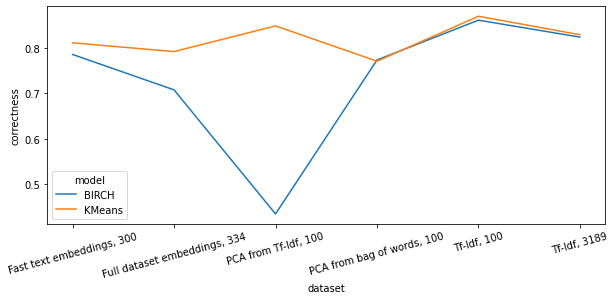

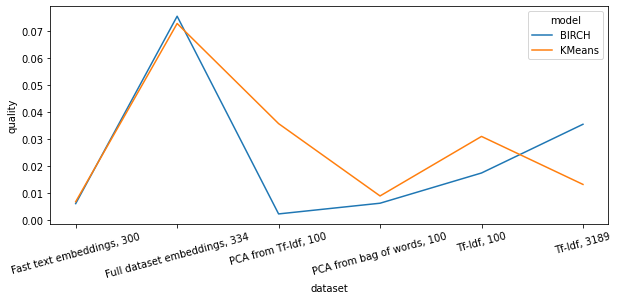

In [617]:
df = comparison.reset_index().pivot(index='dataset', columns='model')
df['correctness'].plot(figsize=(10, 4), rot=15, ylabel='correctness')
df['quality'].plot(figsize=(10, 4), rot=15, ylabel='quality');

`correctness` улучшить не получилось, но зато внутреннее качество кластеров заметно повысилось. Посмотрим, на какие кластеры поделит KMeans всю выборку:

In [15]:
kmeans.fit(embeddings)
labels = pd.Series(kmeans.labels_, index=vacancies.index)
print(clusterization_quality(vacancies, labels))
describe(vacancies, labels)

0.12238187576980511


,cluster cohesion,size,name,skills,salary from,salary to,experience years,schedule id,employment id,accept handicapped,accept kids
labels,,,,,,,,,,,
6,0.1888,20 304,"Менеджер по продажам, Матрос, Офис-менеджер","Пользователь ПК, Работа в команде, Грамотная речь",41 523,62 995,2,fullDay,full,False,False
8,0.1892,12 921,"Машинист экскаватора, Менеджер по продажам, Торговый представитель","Работа в команде, Пользователь ПК, Ведение переговоров",50 095,78 037,2,fullDay,full,False,False
4,0.1685,11 928,"Менеджер по продажам, Машинист экскаватора, Юрист","Пользователь ПК, Ведение переговоров, Работа в команде",52 935,85 799,2,fullDay,full,False,False
2,0.3247,9 872,"Юрист, Главный бухгалтер, Юрисконсульт","Работа в команде, Пользователь ПК, Ведение переговоров",65 426,99 564,4,fullDay,full,False,False
0,0.5352,7 666,"Фасовщик, Полицейский, Разнорабочий","Пользователь ПК, Работа в команде, Грамотная речь",37 405,60 147,0,fullDay,full,False,False
1,0.5514,4 770,"Полицейский, Охранник, Мастер ногтевого сервиса","Работа в команде, Грамотная речь, Пользователь ПК",35 225,50 235,2,shift,full,False,False
7,0.6730,3 007,"Преподаватель английского языка, Зоотехник, Главный зоотехник","Грамотная речь, Работа в команде, Пользователь ПК",34 377,64 259,2,flexible,part,False,False
9,0.8389,831,"Оператор саll-центра, Водитель автобуса, Оператор колл-центра (исходящие звонки)","Пользователь ПК, Работа в команде, Грамотная речь",43 112,101 115,2,fullDay,full,True,False
5,2.8407,95,"Менеджер по продажам, Офис-менеджер, Помощник главного бухгалтера","Пользователь ПК, Грамотная речь, Активные продажи",nan,5 045 283,2,fullDay,full,False,False


Теперь интересно построить график зависимости качества кластеризации от количества кластеров:

In [643]:
n_clusters = range(1, 50, 2)
results = []

for n_c in tqdm_(n_clusters):
    kmeans = KMeans(n_clusters=n_c)
    results.append(evaluate(kmeans, test_data=embeddings_test))

100%|███████████████████████████████████████████████████████████████| 25/25 [14:33<00:00, 34.94s/it]


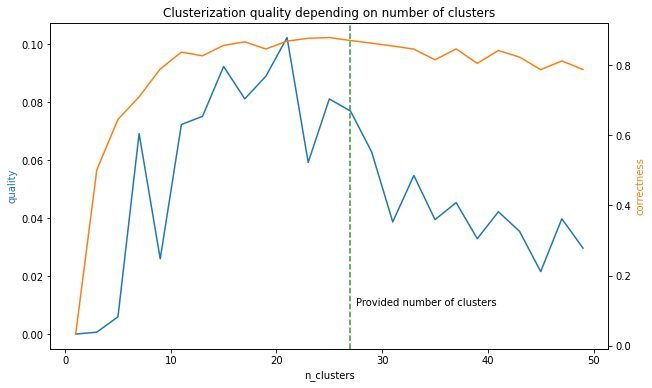

In [704]:
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()

ax.plot(n_clusters, [result['quality'] for result in results])
ax2.plot(n_clusters, [result['correctness'] for result in results], c='C1')

ax.set_xlabel('n_clusters')
ax.set_ylabel('quality', c='C0')
ax2.set_ylabel('correctness', c='C1')
ax.axvline(vacancies['category'].nunique(), ls='--', c='C2', label='12')
ax.text(vacancies['category'].nunique() + .5, .01, 'Provided number of clusters')
plt.title('Clusterization quality depending on number of clusters')
plt.show()

Обе меры качества показывают правдоподобные и схожие значения, что оправдывает их использование. Теперь сравним предоставленные метки и кластеризацию KMeans при одном и том же количестве кластеров:

In [ ]:
from sklearn.metrics import confusion_matrix

kmeans = KMeans(n_clusters=vacancies['category'].nunique())
kmean_results = evaluate(kmeans, test_data=embeddings_test, n_clusters=vacancies['category'].nunique())

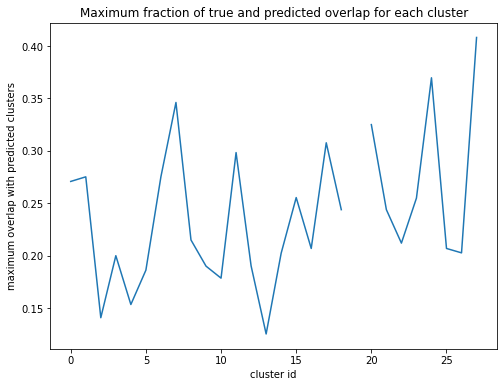

In [741]:
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(vacancies.iloc[test_index]['category'].astype(float).to_numpy(dtype=int), kmeans.labels_)

ax.plot(cm.max(1) / cm.sum(1));
ax.set_xlabel('cluster id')
ax.set_ylabel('maximum overlap with predicted clusters')
plt.title('Maximum fraction of true and predicted overlap for each cluster');

Можно видеть, что даже при лучших представлении данных, модели и количества кластеров не нашлось двух кластеров среди предоставленных и предсказанных, которые совпадали хотя бы на половину. Хочется сказать, что задача кластеризации относится к плохо определенным прикладным задачам, и чтобы ее решать, нужно прежде договориться о выпуклой мере качества.

## Частичное обучение

Часто у нас есть размеченная выборка только для небольшой части выборки. Тогда мы можем применить подходы _частичного обучения (semi-supervised learning)_. Более подробно про реализацию таких методов в sklearn можно прочитать в разделе [semi-supervised](http://scikit-learn.org/stable/modules/label_propagation.html#semi-supervised).

**Задание 7 (2 балла)** 

В этом задание нужно сделать следующее: 

- Разделите объекты, у которых существуют метки, на обучающую и тестовую выборки (при этом не обязательно делить в соотношении 70% на 30%). Обогатите обучающую выборку объектами без меток.
- Воспользовавшись опытом выполнения задания 6, возьмите "лучшее" векторное представление вакансий и обучите [LabelSpreading](http://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html) (подберите лучшие параметры, опираясь на [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)).
- Попробуйте запустить алгоритм несколько раз, отмечая известными различные объекты, а также меняя пропорции разбиения, посчитайте качество и визуализируйте результаты. Можно ли сказать что алгоритм сильно зависит от известных начальных объектов? Есть ли класс, для которого это больше всего заметно?

In [164]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import f1_score

true_labels = vacancies.loc[test_index]['category'].astype(float)

In [165]:
def get_scores(labels: "pd.Series"):
    labels = labels.loc[test_index]
    return {"f1_score": f1_score(true_labels, labels, average='weighted'),
            "quality": clusterization_quality(vacancies, labels),
            "correctness": normalized_correctness(true_labels, labels)}

Данные будем генерировать так: принимаем на вход число, отвечающее доле истинных меток, которая будут известны модели. Случайно выбираем объекты с метками соответсвенно этой доле, у остальных объектов с метками маскируем метки. Берем фиксированную выборку такого же размера из объектов без меток, сливаем вместе и возвращаем. Фиксированную –– чтобы убрать этот фактор случайности и увеличить интерпретирумость результатов.

Далее обучаем модель и считаем F1 меру для каждого кластера, сохраняем.

In [166]:
objects_without_category_index = np.random.choice(train_index, size=len(test_index), replace=False)

def get_train_data(true_labels_ratio):
    masked_labels_count = int(len(true_labels) * (1 - true_labels_ratio))
    masked_labels_index = np.random.choice(test_index, size=masked_labels_count, replace=False)
    index = np.concatenate([test_index, objects_without_category_index])
    X = embeddings.loc[index]
    y = vacancies['category'].loc[index].astype(float).fillna(-1).astype(int)
    y.loc[masked_labels_index] = -1
    return X, y

In [221]:
n_neighbours = range(1, 20, 2)
results = []
X, y = get_train_data(true_labels_ratio = 0.3)

for neighbours in tqdm_(n_neighbours):
    label_spreading = LabelSpreading(kernel='knn', n_neighbors=neighbours)
    label_spreading.fit(X, y)
    labels = pd.Series(label_spreading.transduction_, index=X.index)
    results.append(get_scores(labels))

100%|███████████████████████████████████████████████████████████████| 10/10 [07:25<00:00, 44.52s/it]


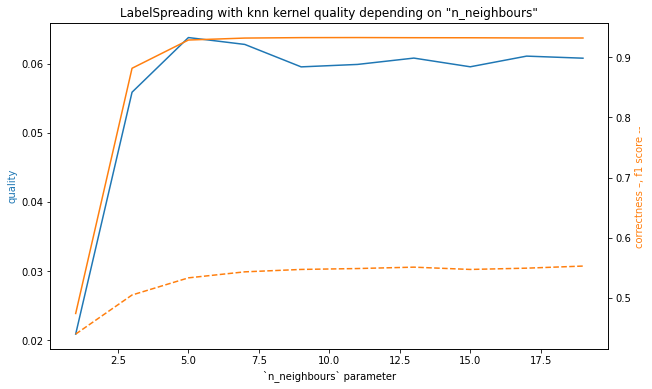

In [222]:
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()

ax.plot(n_neighbours, [result['quality'] for result in results])
ax2.plot(n_neighbours, [result['correctness'] for result in results], c='C1')
ax2.plot(n_neighbours, [result['f1_score'] for result in results], c='C1', ls='--')

ax.set_xlabel('`n_neighbours` parameter')
ax.set_ylabel('quality', c='C0')
ax2.set_ylabel('correctness –, f1 score --', c='C1')
plt.title('LabelSpreading with knn kernel quality depending on "n_neighbours"')
plt.show()

При значении 7 для `n_neighbours` параметра качество выходит на плато –– рассматривание более дальних соседей не дает существенного выигрыша. Интересно, что это и есть значение по умолчанию для этой модели.

In [268]:
def run_label_spreading(true_labels_ratio, n_runs=100):
    label_spreading = LabelSpreading(kernel='knn', n_neighbors=7)
    scores = []
    ys = []
    for _ in tqdm_(range(n_runs)):
        X, y = get_train_data(true_labels_ratio)
        label_spreading.fit(X, y)
        labels = pd.Series(label_spreading.transduction_, index=X.index)
        score = pd.Series(f1_score(true_labels, labels.loc[test_index], average=None, labels=label_sensitivity.index),
                          index=label_sensitivity.index)
        scores.append(score)
        ys.append(y.value_counts().drop(-1))
        
    return scores, ys

In [277]:
true_labels_ratio = 0.3
scores, ys = run_label_spreading(true_labels_ratio)

100%|█████████████████████████████████████████████████████████████| 100/100 [06:35<00:00,  3.95s/it]


Sanity check that on average each cluster is shown `true_labels_ratio` of its labels:

In [233]:
(pd.concat(ys, axis=1).mean(1) / true_labels.value_counts()).agg(['mean', 'std'])

mean    0.299791
std     0.003964
dtype: float64

In [272]:
def plot_f1_scores(scores, ys, true_labels_ratio):
    fig, ax = plt.subplots(figsize=(14, 6))
    label_ids_by_cluste_size = true_labels.value_counts().index[::-1].astype(int)
    ax.boxplot(pd.concat(scores, axis=1).loc[label_ids_by_cluste_size].T, labels=label_ids_by_cluste_size)
    ax.set_xlabel('cluster id')
    ax.set_ylabel('f1 score')
    ax.set_title(f'f1 score for clusters ordered by size, true label ratio {true_labels_ratio}')
    ax.axhline(true_labels_ratio, ls='--')

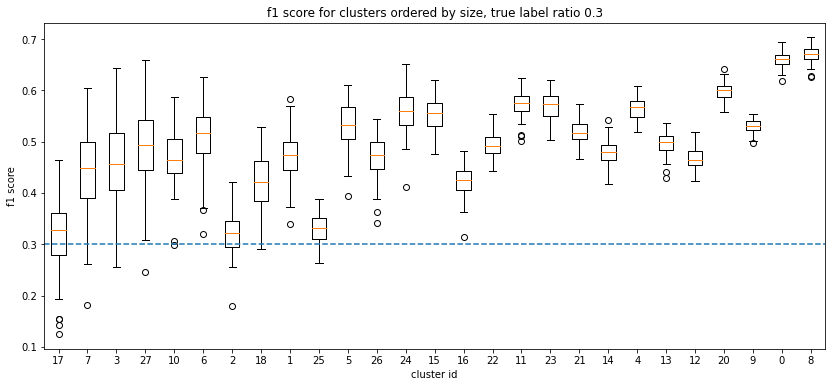

In [278]:
plot_f1_scores(scores, ys, true_labels_ratio)

In [269]:
true_labels_ratio = 0.1
scores, ys = run_label_spreading(true_labels_ratio)

100%|█████████████████████████████████████████████████████████████| 100/100 [06:32<00:00,  3.93s/it]


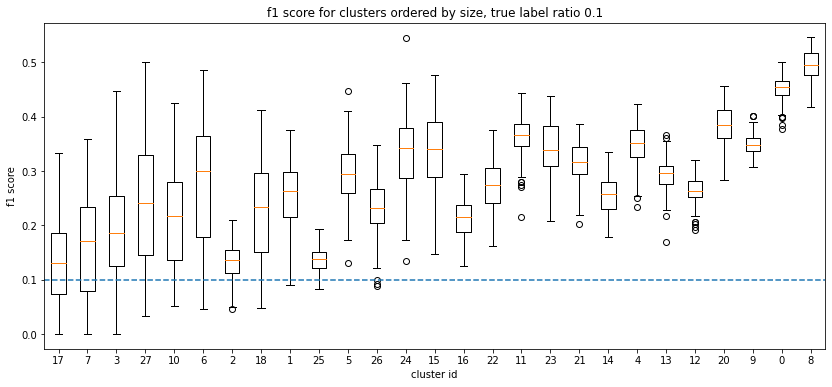

In [274]:
plot_f1_scores(scores, ys, true_labels_ratio)

100%|█████████████████████████████████████████████████████████████| 100/100 [06:32<00:00,  3.93s/it]


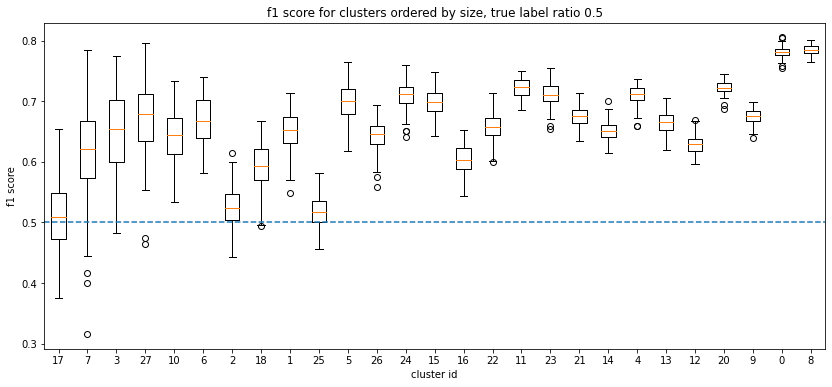

In [276]:
true_labels_ratio = 0.5
scores, ys = run_label_spreading(true_labels_ratio)
plot_f1_scores(scores, ys, true_labels_ratio)

Наш анализ подкрепляет то, что при трех разных запусках с разными разбиениями мы получили схожие результаты. 

Проглядывается слабая связь значения F1 меры от размера кластера –– чем больше кластер, тем больше качество при той же доле известных меток. Но эта связь слишком слабая и зависит от конкретных кластеров, чтобы пытаться давать ей словесное объяснение.

Что касается кластеров, которые выделяются на фоне остальных - это кластеры 17, 2 и 25. Для них знание истинных меток почти не помогает предсказать остальные члены кластеров.

In [301]:
describe(vacancies, true_labels[true_labels.isin([17, 2, 25])],
         topk_names=10, topk_skills=10, description_char_limit=1_000)

,cluster cohesion,size,name,skills,salary from,salary to,experience years,schedule id,employment id,accept handicapped,accept kids
labels,,,,,,,,,,,
25.000000,0.1084,145,"Мастер-приемщик, Менеджер по продажам автомобилей, Мойщик автомобилей, Арматурщик, Инженер-гидравлик, Автомойщик, Менеджер по продажам, Механик, Автомаляр, Специалист по продажам запасных частей и сервисных услуг","Грамотная речь, Деловое общение, Поиск и привлечение клиентов, Пользователь ПК, Консультирование клиентов, Навыки продаж, Знание устройства автомобиля, Телефонные переговоры, Работа в команде, Ведение отчетности",42 618,97 231,2,fullDay,full,False,False
2.000000,0.2958,71,"Графический дизайнер, Дизайнер, Педагог-хореограф, Аниматор, Фотограф, Звукорежиссёр, Видеомонтажер, Редактор, Инструктор аттракционов, Ведущий мастер в квест-шоу (актер)","Adobe Photoshop, Грамотная речь, Грамотность, Adobe Illustrator, Пользователь ПК, CorelDRAW, Работа в команде, Графические редакторы, Adobe InDesign, Редактирование",37 138,47 651,2,fullDay,full,False,False
17.000000,0.4861,26,"Инженер электросвязи, Инженер-проектировщик, Инженер-приемщик в сервисный центр (бензо-/электроинструмент), Электромонтер диспетчерского оборудования и телеавтоматики, Инженер-установщик GPS оборудования, Монтажник связи (м‎онтер-слаботочник), Мастер по ремонту крупной бытовой техники, Сервисный инженер (компрессорное оборудование), Инженер по ремонту проекторов, Менеджер по управлению Холодильным Оборудованием","Ремонтные работы, Работа с оргтехникой, 1С: Производство, Сборка ПК, Ремонт строительного оборудованияРемонт ПК, Ремонт электроинструмента, Электромонтажные работыРемонт бензоинструмента, Техническое обслуживаниеАнглийский язык, Работа в команде, Умение работать в команде",52 846,83 444,2,fullDay,full,False,False
